# Theory 1. Time series(TS) are everywhere
- Situation 1: You are responsible for a pizza delivery center and you want to know if your sales follow a particular pattern because you feel that every Saturday evening there is a increase in the number of your orders…


- Situation 2: Your company is selling a product and you are in charge of predicting, or forecasting, the supplies needed for this product at a particular moment in the future…


- Situation 3: You are monitoring a datacenter and you want to detect any anomaly such as an abnormal CPU usage which might cause a downtime on your servers. You follow the curve of the CPU usage and want to know when an anomaly occurs…

In each of these situations, you are dealing with time series. Analyzing series is a fascinating job because despite all mathematical models (including neural networks), we humans still fail to predict the future and have to deal with uncertainty. Let’s have a closer look at what time series are and which methods can be used to analyze them. 

In this article, we will extensively rely on the statsmodels library written in Python.
A time series is a data sequence ordered (or indexed) by time. It is discrete, and the the interval between each point is constant.


### Properties and types of series

- Every Time Series has particular behaviour over the time with following types, and there is high probability that It will follow the same behaviour in future



1. Trend : 
    - A long-term increase or decrease in the data. This can be seen as a slope (is doesn’t have to be linear) roughly going through the data.     
    - direction of somethingdeveloping/droping over long period of time, sales if keep on increasing over time is trend 
    - Statistically is it varying mean over a long period of time
     
     
     
2. Seasonality : 
    - A time series is said to be seasonal when it is affected by seasonal factors (hour of day, week, month, year, etc.). 
    - Seasonality can be observed with nice cyclical patterns of fixed frequency.
    - repeating pattern at regular short interval 
    - varying means over short interval


3. Cyclicity : 
    - A cyclicity occurs when the data exhibits rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. 
   - The duration of these fluctuations is usually at least 2 years.
   - If there are constant values(sales per day= 500),(data is function Sin,cos), 
   - this is not for TS Analysis.
   
   
4. Residuals : 
    - Each time series can be decomposed in two parts:
    - A forecast, made up of one or several forecasted values
    - Residuals. They are the difference between an observation and its predicted value at each time step. 
    - Remember that:
                        Value of series at time t = Predicted value at time t + Residual at time t
   
   
5. Irragularity :
    - outliers, Something happens accidently like disaster
    
    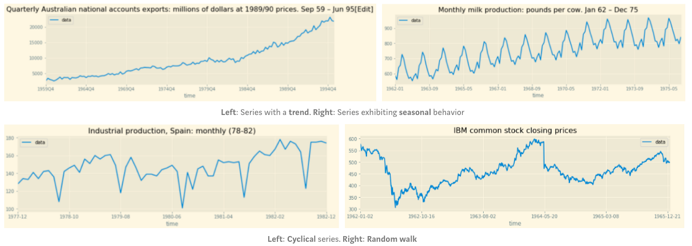
    
#### Cycle + sesonality
            components are for short period and can be -ve/+ve both
            Notice again these +ve and -ve fluction are cancelling out each other at the end of that period,
            So no net changes introduced by over give cycle or season is zero
  Note: Random Noise /resid are for long term, So there sum is zero for long term
  
### Important Note: 
   ##### There are four components of Time Series data, That makes it non - stationary data
   #####  1. Trend, 2. Seasnality,3. Irregularity, 4. Cyclic:

In [483]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
import numpy as np
%matplotlib inline

#### Time Series Analysis , Theory with example ( Coarse link)
#### https://courses.analyticsvidhya.com/courses/take/creating-time-series-forecast-using-python/texts/6134208-modeling-techniques

# Theory 2. Stationary vs Non-Stationary TS data? 

##### Stationarity or stationarity data ?
   - Has strict criterion with no trend & no seasonality.  
   - However,for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:
        - a. Constant mean over time, 
        - b. constant variance that depends and 
        - c. constant on short interval, auto Covariance do not dependent on time))
        - d. Note: an autocovariance that does not depend on time.
  
   - Simply, TS data is stationary when its mean, variance,& covarianceare constant and not dependent on time.
   - Only stationary TS data can be used for forcasting. 
   
 
##### non-stationary TS data ?
   - It has its means, variances, and covariances that change over time.
   - has shows trends,seasonality, cyclicity,residuals so-called temporal dependences that makes it non-stationary.
   - Non-stationary data, as a rule, are unpredictable and cannot be modeled or forecasted. The results obtained by using non-stationary time series may be spurious in that they may indicate a relationship between two variables where one does not exist. 
   - In order to receive consistent, reliable results, the non-stationary data needs to be transformed into stationary data.

Click to understand more about Stationarity
https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

##### Types of Stationarity
Let us understand the different types of stationarities and how to interpret the results of the above tests.

   - Strict Stationary: A strict stationary series satisfies the mathematical definition of a stationary process. For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to convert a non-stationary series into a strict stationary series for making predictions.
   
   
   - Trend Stationary: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.
   
   
   - Difference Stationary: A time series that can be made strict stationary by differencing falls under difference stationary. ADF test is also known as a difference stationarity test.

## Perform some test to check IF TS data has Stationarity ?
###### Most Time Series data has Trends and seasonility, challenge is identify and eliminate them
###### Following methods are available to check stationarity of the  TS data
   1. Rolling Average( Plotting rolling statistics):
        - Plotting rolling means and variances is a first good way to visually inspect our series. If the rolling statistics exhibit a clear trend (upwards or downwards) and show varying variance (increasing or decreasing amplitude), then you might conclude that the series is very likely not to be stationary.
        
        
   2. ADCF test (Augmented Dickey-Fuller Test):
        - This test is used to assess whether or not a time-series is stationary. Without getting into too much details about hypothesis testing, you should know that this test will give a result called a “test-statistic”, based on which you can say, with different levels (or percentage) of confidence, if the time-series is stationary or not.

   3. KPSS
        - The KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test tests for the null hypothesis that the series is trend stationary. In other words, if the p-value of the test statistic is below the X% confidence threshold, this means we can reject this hypothesis and that the series is not trend-stationary with X% confidence. A p-value higher than the threshold will lead us to accept this hypothesis and conclude that the series is trend-stationary.

   4. Autocorrelation plots (ACF & PACF)
        - An autocorrelation (ACF) plot represents the autocorrelation of the series with lags of itself. A partial autocorrelation (PACF) plot represents the amount of correlation between a series and a lag of itself that is not explained by correlations at all lower-order lags.
        - Ideally, we want no correlation between the series and lags of itself. Graphically speaking, we would like all the spikes to fall in the blue region.
        
Be Carefull while examining the possible outcomes of above stationary tests.

- Case 1: Both tests conclude that the series is not stationary -> series is not stationary


- Case 2: Both tests conclude that the series is stationary -> series is stationary


- Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary


- Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationar

# THEORY 3: Eliminating non-stationarity or making TS stationary

####  Must have characterstics of TS is Stationarity  (That means it has No trend & No seasonality)
####  Trend and seasonality Elimination are two very important task to make TS stationary.
After Transformation and stationarizing data we can  apply statistical forecasting techniques Time series Data.
Click to know more about elimation->https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

 1. Eliminating Trend ( Use De-Trending) 
     - It use Simple MA, Weighed MA, Exponential Weighted MA-- EMA is more usefull
     - WMA, EMA both rely more heavily on the most recent prices/data and placing less value on older prices/data.
     - A shorter moving average suffers from less lag than a longer moving average.
     - All MA are lagging indicators
     - They may have bad effect on data responsive ness but yes they eliminate trends.
     
     - i) np.log(series) - movingAvg(Series) ( Moving Average)
     - ii) np.log(series) - Series.evma(ts_log, halflife=12) (exponentially weighted MA)
     
 2. Eliminating Seanality (Use Differencing)
     - i) Differencing ( np.log(series) -   np.log(series).shift() )
        - Seasonal or cyclical patterns can be removed by substracting periodical values. If the data is 12-month seasonal, substracting the series with a 12-lag difference series will give a “flatter” series
     
 3. Eliminating Trend and seasonality (use Decomposing)
        
# De-Trending and Differencing 
click for more detail-> https://www.investopedia.com/articles/trading/07/stationary.asp

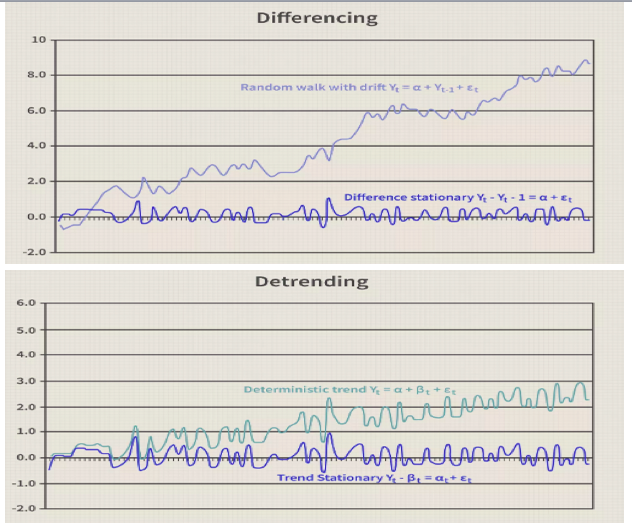






#### Decomposition of a time series
    from statsmodels.tsa.seasonal import seasonal_decompose
    decomposition = seasonal_decompose(ts_log)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
 
 You can use "residual" which is free of trend and seasonal
Observe the decomposition in below plot



Our time series shows a clear upwards trend. It is not seasonal, as you can see that the seasonal component looks quite ugly. The residuals’ variance seems to increase through time, showing that the series exhibits more random behavior at the end.


# THEORY 4:
#### Types of TimeSeries Model

#####    Additive model,
         It add all the compenents of time series.
         The behavior is linear where changes over time are consistently made by the same amount, like a linear trend. In this situation, the linear seasonality has the same amplitude and frequency.

#####    Multiplicative model,
       it multiply all the compenents of time series 
       In this situation, trend and seasonal components are multiplied and then added to the error component. 
       It is not linear, can be exponential or quadratic and represented by a curved line
       A multiplicative decomposition roughly corresponds to an additive decomposition of the logarithms.

-----------
multiplicative vs additive modeling

--------------------
import statsmodels.api as sm

--------------------
decomposition = sm.tsa.seasonal_decompose(y, model=’multiplicative’)

--------------------
decomposition = sm.tsa.seasonal_decompose(y, model=’additive’)

------------------


#### Time Series Forecasting  models are
- i) Naive Approach
- ii) Moving Average
- iii) Simple Exponential Smoothing
- iv) Exponential smoothing
- v) Holt’s Linear Trend Model
- vi) ARIMA ( AR + I+ MA that means (Auto regressiveS) is Integrated with (Moving Average)
            ( AR tells about if there is any correlation between data, time)
- vii) SARIMAX

Note: If there is Noise in the TS, solution is to Average it out.


### Why can't we build regreesion model instead of TS models
##### (Difference between a time series and regression problem)

Here you might think that as the target variable is numerical it can be predicted using regression techniques, but a time series problem is different from a regression problem in following ways:

1. The main difference is that a time series is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
2. Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends,i.e. variations specific to a particular time frame.

So, predicting a time series using regression techniques is not a good approach.
Time series analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. Time series forecasting is the use of a model to predict future values based on previously observed values.

# Practical Example
## lets Start Understanding E2E JetTrain TS Data Forcasting Example
## Let’s look at the steps that we will follow in this course to solve the problem at hand.

### Phase 1  Understanding Data:


1) Hypothesis Generation

2) Getting the system ready and loading the data

3) Dataset Structure and Content

4) Feature Extraction

5) Exploratory Analysis

### Phase 2 checking the stationarity of Data:



### Phase 3 Forecasting using Multiple Modeling Techniques:
1) Splitting the data into training and validation part

2) Modeling techniques

3) Holt’s Linear Trend Model on daily time series

4) Holt Winter’s Model on daily time series

5) Introduction to ARIMA model

6) Parameter tuning for ARIMA model

7) SARIMAX model on daily time series



###  Phase I. Step 1. Hypothesis Generation
Data Scientist needs to generate hyprothesis, So i have generated following are Four Hypothesis Generated based on the Problem Statement.

"""
1. There will be an increase in the traffic as the years pass by.
2. The traffic will be high from May to October.
3. Traffic on weekdays will be more as compared to weekends/holidays.
4. Traffic during the peak hours will be high.
We will try to validate each of these hypothesis based on the dataset. Now let’s have a look at the dataset.
"""

###   Phase I. Step 2.  Data loading 

In [484]:
train=pd.read_csv("/Users/keeratjohar2305/Downloads/Dataset/data/Unicorn_JetRail_Train.csv")
test=pd.read_csv("/Users/keeratjohar2305/Downloads/Dataset/data/Unicorn_JetRail_Test.csv")
submission=pd.read_csv("/Users/keeratjohar2305/Downloads/Dataset/data/Unicorn_JetRail_Sample_Subm.csv")


###   Phase I. Step 3. Dataset Structure and Content

In [485]:
print(train.shape,test.shape)
train.head(3)

(18288, 3) (5112, 2)


ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6

In [486]:
train2=pd.read_csv("/Users/keeratjohar2305/Downloads/Dataset/data/Unicorn_JetRail_Train.csv",
                parse_dates=['Datetime'], 
                na_values=[0],
                index_col = 'Datetime')
train2['Datetime']=train2.index
train2.drop('ID',1,inplace=True)
train2.head(3)

Count            Datetime
Datetime                                      
2012-08-25 00:00:00      8 2012-08-25 00:00:00
2012-08-25 01:00:00      2 2012-08-25 01:00:00
2012-08-25 02:00:00      6 2012-08-25 02:00:00

In [487]:
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")

###   Phase I.  Step 4. Feature Extraction

In [488]:
# reseting the index with datatime
train.Datetime= pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test.Datetime= pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Datetime
test.index = test.Datetime
if 'ID' in train.columns:
    train = train.drop('ID',axis=1)

    
df = train.copy()
df_test= test.copy()

In [489]:
def applier(row):
    if row == 5 or row == 6:
        return 1
    else:
        return 0


df_test['year'] = df_test.Datetime.dt.year
df_test['day'] = df_test.Datetime.dt.day
df_test['month'] = df_test.Datetime.dt.month
df_test['Hour'] = df_test.Datetime.dt.hour
df_test['day of week'] = df_test['Datetime'].dt.dayofweek
df_test['weekend'] = df_test['Datetime'].dt.dayofweek.apply(applier)
print(df_test.head(2))
print(df_test.index)

df_test

                        ID            Datetime  year  day  month  Hour  \
Datetime                                                                 
2014-09-26 00:00:00  18288 2014-09-26 00:00:00  2014   26      9     0   
2014-09-26 01:00:00  18289 2014-09-26 01:00:00  2014   26      9     1   

                     day of week  weekend  
Datetime                                   
2014-09-26 00:00:00            4        0  
2014-09-26 01:00:00            4        0  
DatetimeIndex(['2014-09-26 00:00:00', '2014-09-26 01:00:00',
               '2014-09-26 02:00:00', '2014-09-26 03:00:00',
               '2014-09-26 04:00:00', '2014-09-26 05:00:00',
               '2014-09-26 06:00:00', '2014-09-26 07:00:00',
               '2014-09-26 08:00:00', '2014-09-26 09:00:00',
               ...
               '2015-04-26 14:00:00', '2015-04-26 15:00:00',
               '2015-04-26 16:00:00', '2015-04-26 17:00:00',
               '2015-04-26 18:00:00', '2015-04-26 19:00:00',
               '2015

ID            Datetime  year  day  month  Hour  \
Datetime                                                                 
2014-09-26 00:00:00  18288 2014-09-26 00:00:00  2014   26      9     0   
2014-09-26 01:00:00  18289 2014-09-26 01:00:00  2014   26      9     1   
2014-09-26 02:00:00  18290 2014-09-26 02:00:00  2014   26      9     2   
2014-09-26 03:00:00  18291 2014-09-26 03:00:00  2014   26      9     3   
2014-09-26 04:00:00  18292 2014-09-26 04:00:00  2014   26      9     4   
2014-09-26 05:00:00  18293 2014-09-26 05:00:00  2014   26      9     5   
2014-09-26 06:00:00  18294 2014-09-26 06:00:00  2014   26      9     6   
2014-09-26 07:00:00  18295 2014-09-26 07:00:00  2014   26      9     7   
2014-09-26 08:00:00  18296 2014-09-26 08:00:00  2014   26      9     8   
2014-09-26 09:00:00  18297 2014-09-26 09:00:00  2014   26      9     9   
2014-09-26 10:00:00  18298 2014-09-26 10:00:00  2014   26      9    10   
2014-09-26 11:00:00  18299 2014-09-26 11:00:00  2014   26      9    11   
2014-09-26 12:00:00  18300 2014-09-26 12:00:00  2014   26      9    12   
2014-09-26 13:00:00  18301 2014-09-26 13:00:00  2014   26      9    13   
2014-09-26 14:00:00  18302 2014-09-26 14:00:00  2014   26      9    14   
2014-09-26 15:00:00  18303 2014-09-26 15:00:00  2014   26      9    15   
2014-09-26 16:00:00  18304 2014-09-26 16:00:00  2014   26      9    16   
2014-09-26 17:00:00  18305 2014-09-26 17:00:00  2014   26      9    17   
2014-09-26 18:00:00  18306 2014-09-26 18:00:00  2014   26      9    18   
2014-09-26 19:00:00  18307 2014-09-26 19:00:00  2014   26      9    19   
2014-09-26 20:00:00  18308 2014-09-26 20:00:00  2014   26      9    20   
2014-09-26 21:00:00  18309 2014-09-26 21:00:00  2014   26      9    21   
2014-09-26 22:00:00  18310 2014-09-26 22:00:00  2014   26      9    22   
2014-09-26 23:00:00  18311 2014-09-26 23:00:00  2014   26      9    23   
2014-09-27 00:00:00  18312 2014-09-27 00:00:00  2014   27      9     0   
2014-09-27 01:00:00  18313 2014-09-27 01:00:00  2014   27      9     1   
2014-09-27 02:00:00  18314 2014-09-27 02:00:00  2014   27      9     2   
2014-09-27 03:00:00  18315 2014-09-27 03:00:00  2014   27      9     3   
2014-09-27 04:00:00  18316 2014-09-27 04:00:00  2014   27      9     4   
2014-09-27 05:00:00  18317 2014-09-27 05:00:00  2014   27      9     5   
...                    ...                 ...   ...  ...    ...   ...   
2015-04-25 18:00:00  23370 2015-04-25 18:00:00  2015   25      4    18   
2015-04-25 19:00:00  23371 2015-04-25 19:00:00  2015   25      4    19   
2015-04-25 20:00:00  23372 2015-04-25 20:00:00  2015   25      4    20   
2015-04-25 21:00:00  23373 2015-04-25 21:00:00  2015   25      4    21   
2015-04-25 22:00:00  23374 2015-04-25 22:00:00  2015   25      4    22   
2015-04-25 23:00:00  23375 2015-04-25 23:00:00  2015   25      4    23   
2015-04-26 00:00:00  23376 2015-04-26 00:00:00  2015   26      4     0   
2015-04-26 01:00:00  23377 2015-04-26 01:00:00  2015   26      4     1   
2015-04-26 02:00:00  23378 2015-04-26 02:00:00  2015   26      4     2   
2015-04-26 03:00:00  23379 2015-04-26 03:00:00  2015   26      4     3   
2015-04-26 04:00:00  23380 2015-04-26 04:00:00  2015   26      4     4   
2015-04-26 05:00:00  23381 2015-04-26 05:00:00  2015   26      4     5   
2015-04-26 06:00:00  23382 2015-04-26 06:00:00  2015   26      4     6   
2015-04-26 07:00:00  23383 2015-04-26 07:00:00  2015   26      4     7   
2015-04-26 08:00:00  23384 2015-04-26 08:00:00  2015   26      4     8   
2015-04-26 09:00:00  23385 2015-04-26 09:00:00  2015   26      4     9   
2015-04-26 10:00:00  23386 2015-04-26 10:00:00  2015   26      4    10   
2015-04-26 11:00:00  23387 2015-04-26 11:00:00  2015   26      4    11   
2015-04-26 12:00:00  23388 2015-04-26 12:00:00  2015   26      4    12   
2015-04-26 13:00:00  23389 2015-04-26 13:00:00  2015   26      4    13   
2015-04-26 14:00:00  23390 2015-04-26 14:00:00  2015   26      4    14   
2015-04-26 15:00:00  23391 2

In [490]:
train.shape

(18288, 2)

In [ ]:
df['year'] = df.Datetime.dt.year
df['day'] = df.Datetime.dt.day
df['month'] = df.Datetime.dt.month
df['Hour'] = df.Datetime.dt.hour
df['day of week'] = df['Datetime'].dt.dayofweek
df['weekend'] = df['Datetime'].dt.dayofweek.apply(applier)
print(df.head(2))
print(df.index)



In [492]:
df.shape

(18288, 8)

In [493]:
train.shape

(18288, 2)

In [494]:
df.dtypes

Datetime       datetime64[ns]
Count                   int64
year                    int64
day                     int64
month                   int64
Hour                    int64
day of week             int64
weekend                 int64
dtype: object

- Here we can infer or conclude that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

- We will work on the train file for all the analysis and will use the test file for forecasting.

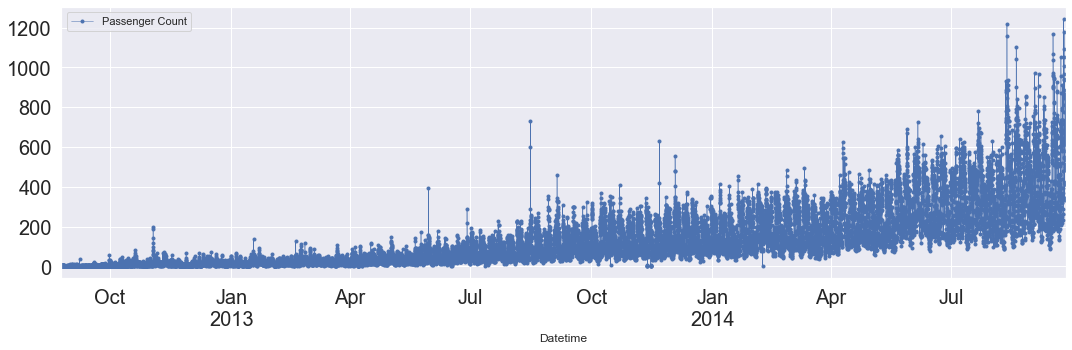

In [495]:
df.Count.plot(figsize=(18,5), linewidth=0.5, fontsize=20,marker='.',label='Passenger Count' )
plt.legend(loc='best')

Now Lets recall the hypothesis that we made earlier:

- Traffic will increase as the years pass by
- Traffic will be high from May to October
- Traffic on weekdays will be more
- Traffic during the peak hours will be high
- After having a look at the dataset, we will now try to validate our hypothesis and make other inferences from the dataset.

###   Phase I. Step 5. Exploratory Analysis FOR verify our hypothesis using the actual data.

In [496]:

#df.rolling(window=7).mean() #.plot(figsize=(18,5), linewidth=0.5, fontsize=12,marker='.',label='Moving STD' )

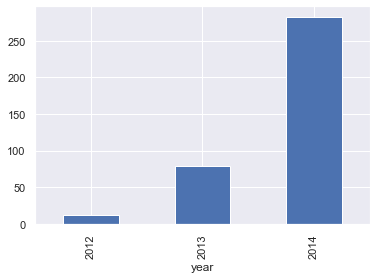

In [497]:
# 1a. Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.
df.groupby('year')['Count'].mean().plot.bar()
# It is observed that traffic is increasing every year

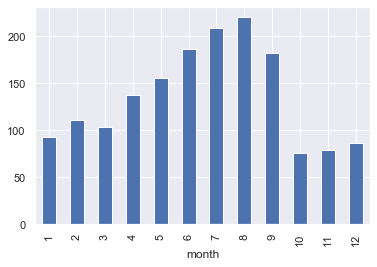

In [498]:
 # 2nd hypothesis, there is increase in traffic from May to October. So, let’s see the relation between count and month.

df.groupby('month')['Count'].mean().plot.bar()
# Yes, it observed in plot, that sales is increased from july to sept, but dropped in Oct onward

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

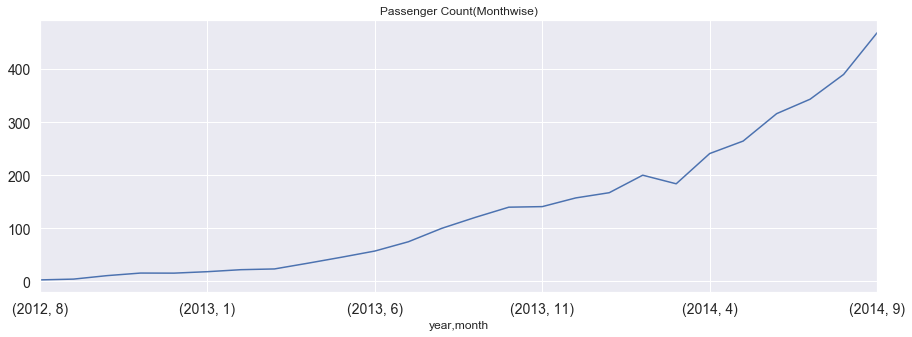

In [499]:
df.groupby(['year','month'])['Count'].mean().plot(figsize=(15,5),title= 'Passenger Count(Monthwise)', 
                                                  fontsize=14)

Above (year,month) Plot observations are:  
- We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.
- Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.
- In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

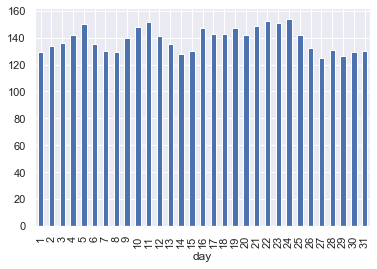

In [500]:
#1b  2nd Hypotheis was , monthly mean of each year separately 
df.groupby('day')['Count'].mean().plot.bar()

- We are not getting much insights from day wise count of the passengers.
#### We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.

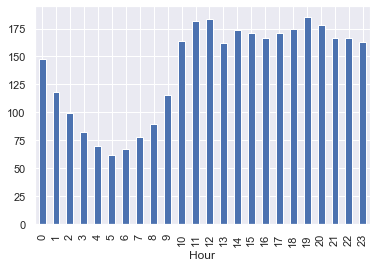

In [501]:
df.groupby('Hour')['Count'].mean().plot.bar()

- It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
- After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

#### Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

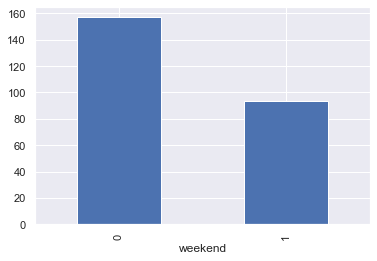

In [502]:
df.groupby('weekend')['Count'].mean().plot.bar()

It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

#### Now we will try to look at the day wise passenger count.

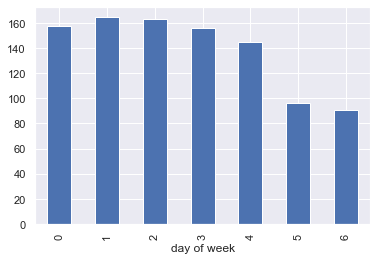

In [503]:
df.groupby('day of week')['Count'].mean().plot.bar()

From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week.

##### As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

#### Let’s look at the hourly, daily, weekly and monthly time series.

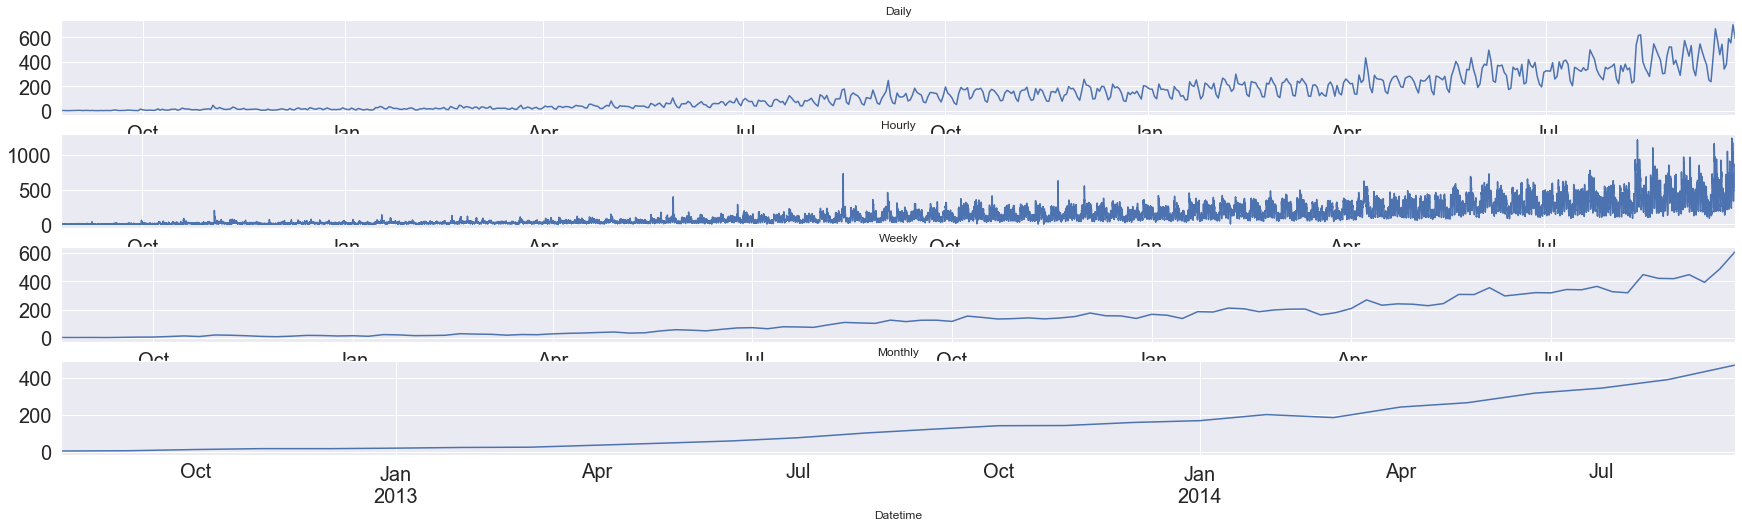

In [504]:
# let do resamplying of data , hourly,monthly,daily,weekly by aggregating through mean()
# AS there is unstablilty hourly data , resample will give clear understanding of the data
Daily=df.resample('D').mean() # mean of each day separetly all the years
Hourly=df.resample('H').mean() # mean of every hour  separetly of each day all the years
Weekly=df.resample('W').mean() # mean of every week separetly for all the years
Monthly=df.resample('M').mean() # mean of every month for separetly all the years
fig, axs = plt.subplots(4,1) 
Daily.Count.plot(figsize=(30,8),title='Daily',fontsize=20,ax=axs[0])
Hourly.Count.plot(figsize=(30,10), title= 'Hourly', fontsize=20, ax=axs[1])
Weekly.Count.plot(figsize=(30,8),title='Weekly',fontsize=20,ax=axs[2])
Monthly.Count.plot(figsize=(30,8),title='Monthly',fontsize=20,ax=axs[3])

We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. 
## So, we will work on the daily time series.

In [505]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

In [506]:
# 3rd hypthesis, there is increase of traffic in week ends
#df.groupby(['year','month','weekend'])['Count'].mean().plot.bar(figsize=(25,10))

# No Wrong, It is observed in plot, the sales is dropping in weekend  
# but data is not statitonary in terms of means which is contineously increase and not constant

In [507]:
#fig, axs =  plt.subplots(2,1)
#df.groupby(['year','month','day of week'])['Count'].mean().plot(figsize=(30,10),fontsize=30,ax=axs[0])
#df.groupby(['year','month','day of week'])['Count'].mean().plot.bar(figsize=(30,10),fontsize=30,ax=axs[1])

In [508]:
#fig, axs= plt.subplots(4,1)
#df.groupby(['year','month'])['Count'].mean().plot(figsize=(15,5),title= 'Passenger Count(Monthwise)', 
#                                                  fontsize=14,ax=axs[0])
#df.groupby(['year','month'])['Count'].mean().plot.bar(figsize=(15,5),title= 'Passenger Count(Monthwise)',
#                                                  fontsize=14,ax=axs[1])
#df.groupby('day')['Count'].mean().plot(figsize=(15,5),title= 'Passenger Count(daywise)',
#                                                  fontsize=14,ax=axs[2])
#df.groupby('day')['Count'].mean().plot.bar(figsize=(15,5),title= 'Passenger Count(daywise)',
#                                                  fontsize=14,ax=axs[3])

In [509]:
#print(train.rolling(window=12).mean().isnull().sum())
#print(train.ix['2014-08-25':'2014-09-04'].count())
#print(train.ix['2014-08-25':'2014-09-04']['Count'].mean())

# Phase 2. Step1  Ploting Rolling Average 
Lets understand the rolling forward behaviour
    1. Take a fixed size subset from the series
    2. The first element of the moving average dataset is obtained by taking the average of the initial fixed subset. 
    3. Then the subset is modified by "shifting forward" it in the series; that is, excluding the first number of the series and including the next value in the subset.
    4. Then Second element of the moving average dataset is taking of the new subset and so on


 window=11 parameter is the value of subset ..here it picks the data of first 10 days
 Note: the value against first 1 subset( 11 days) would Nan

 A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles

the below example, The first graph showing fluctuatio and 2nd one showing the smooth curve with trend to remove removing tread from timeseries data , we should substract its mean() from it.

There is slope of blue line, We were able to identify the series in which mean 
      and variance were changing with time


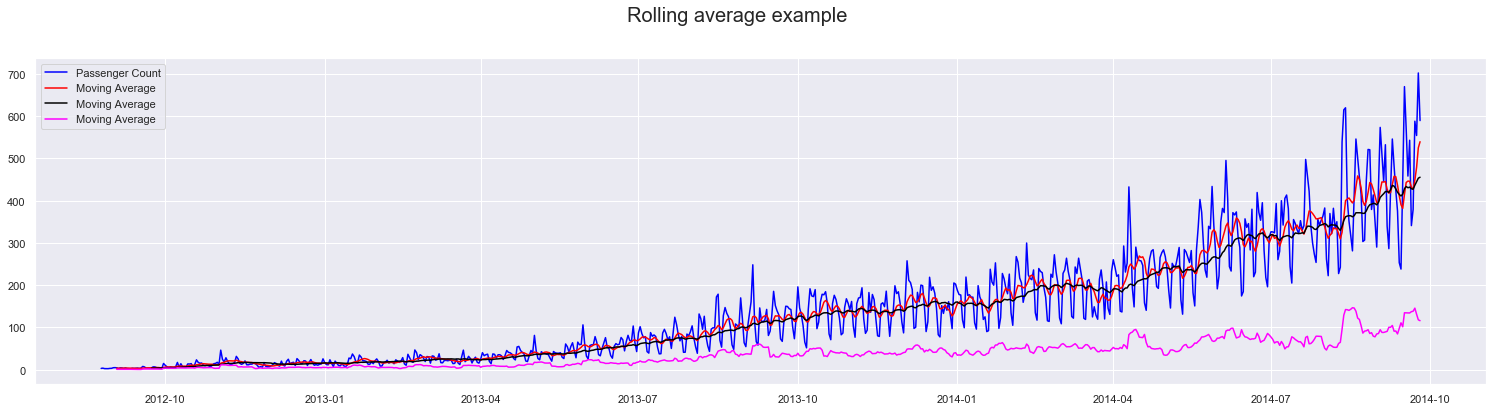

In [510]:

plt.figure(figsize=(26,6))
plt.suptitle("Rolling average example", y=1.0, fontsize=20)
plt.plot(train.Count,label='Passenger Count',color='blue' ) # Visual test 
plt.plot(train.rolling(window=10).mean(),label='Moving Average',color='red' )
plt.plot(train.rolling(window=30).mean(),label='Moving Average',color='black' )
plt.plot(train.rolling(window=10).std(),label='Moving Average',color='magenta' )
plt.legend(loc='best')
print("""There is slope of blue line, We were able to identify the series in which mean 
      and variance were changing with time""")

# Phase 2 step2. Dickey Fuller or ad fuller test
 It tells 
  1. test_Statistics values near zero means data is stationary and 
  2. pValue values near zero  means data is stationary

Note : low value of test_Statistics and pValue is desirable for stationary data

Click to understand more about Stationarity
https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/



In [511]:
from statsmodels.tsa.stattools import adfuller
addfull=adfuller(train.Count, autolag='AIC')
print(" > Is the data stationary via addfuller test?")
dftest = adfuller(train.Count, autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("#Lag Used: = {:.3f}".format(addfull[2]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

def isStationary(tstats):
    if addfull[0] < 0.5:
        return 'TS data is stationary'
    else:
        return 'TS data is non-stationary'    
print(isStationary(addfull[0]))


 > Is the data stationary via addfuller test?
Test statistic = 2.986
P-value = 1.000
#Lag Used: = 20.000
Critical values :
	1%: -3.4392057325732104 - The data is not stationary with 99% confidence
	5%: -2.8654483492874236 - The data is not stationary with 95% confidence
	10%: -2.5688512291811225 - The data is not stationary with 90% confidence
TS data is non-stationary


## PHASE 2. STEP 3. KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test
KPSS is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series. We will understand the trend stationarity in detail in the next section. For now, let’s focus on the implementation and see the results of the KPSS test.

In [512]:
from statsmodels.tsa.stattools import kpss
print(" > Is the data stationary via kpss test?")
kpss_result=kpss(train.Count,regression='c')
print("Test statistic = {:.3f}".format(kpss_result[0]))
print("P-value = {:.3f}".format(kpss_result[1]))
print("#Lag Used: = {:.3f}".format(kpss_result[2]))
print("Critical values :")
for k, v in kpss_result[3].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<kpss_result[0] else "", 100.0-float(k[:-1])))


def isStationary(tstats):
    if kpss_result[0] < 0.5:
        return 'TS data is stationary'
    else:
        return 'TS data is non-stationary'    
print(isStationary(kpss_result[0]))


 > Is the data stationary via kpss test?
Test statistic = 3.403
P-value = 0.010
#Lag Used: = 20.000
Critical values :
	10%: 0.347 - The data is not stationary with 90.0% confidence
	5%: 0.463 - The data is not stationary with 95.0% confidence
	2.5%: 0.574 - The data is not stationary with 97.5% confidence
	1%: 0.739 - The data is not stationary with 99.0% confidence
TS data is non-stationary


## PHASE 2. STEP 4. Autocorrelation & Partial Auto Correlation

Ideally, we want no correlation between the series and lags of itself

    - An autocorrelation (ACF) plot represents the autocorrelation of the series with lags of itself.
    - A partial autocorrelation (PACF) plot represents the amount of correlation between a series and a lag of itself that is not explained by correlations at all lower-order lags.


Generally speaking, Statistical correlation summarizes the strength of the relationship between two variables.

Here It uses The Pearson’s correlation coefficient which is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation


Text(0, 0.5, 'correlation value -1<>1')

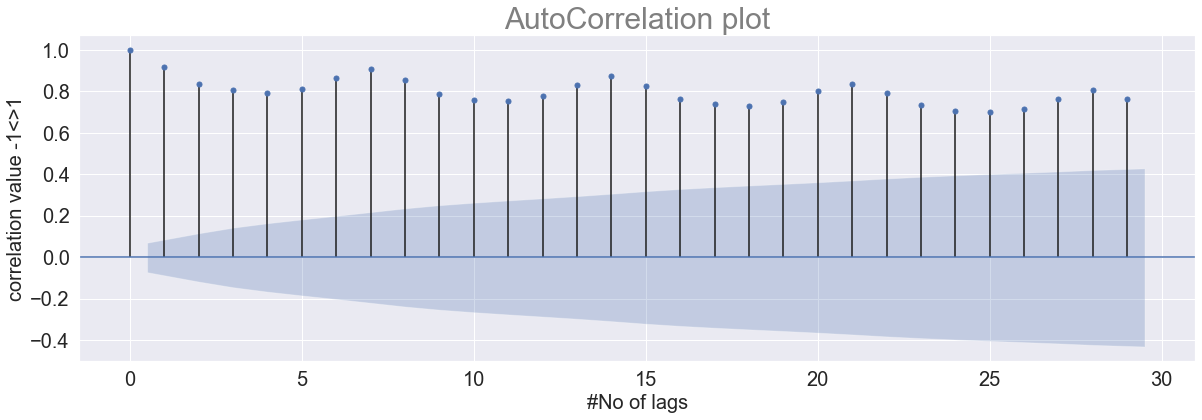

In [513]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(20,6))
ax= plt.subplot(111)
plot_acf(train.Count,ax=ax)
plt.xticks(fontsize=20)
plt.title("AutoCorrelation plot",fontsize=30,color='grey')
plt.yticks(fontsize=20)
plt.xlabel("#No of lags",fontsize=20)
plt.ylabel("correlation value -1<>1",fontsize=20)

Text(0, 0.5, 'correlation value -1<>1')

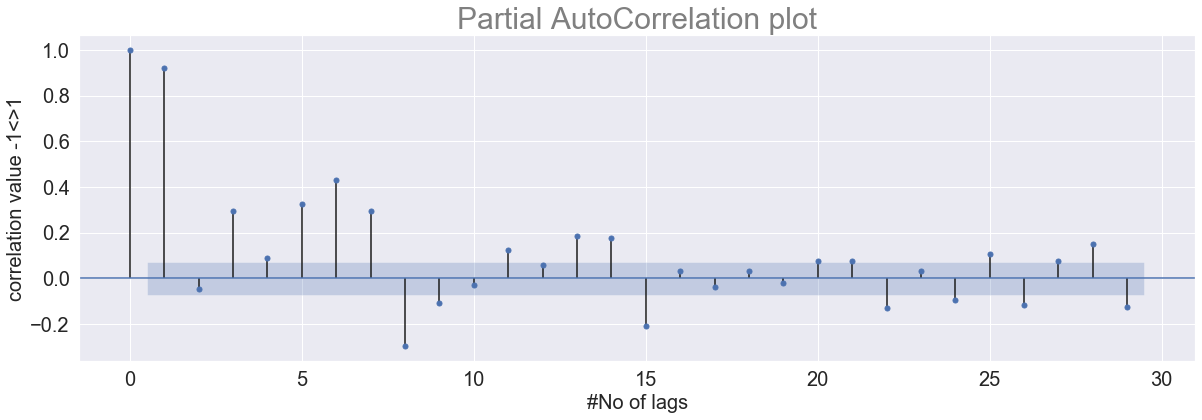

In [514]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(20,6))
ax= plt.subplot(111)
plot_pacf(train.Count,ax=ax)
plt.xticks(fontsize=20)
plt.title("Partial AutoCorrelation plot",fontsize=30,color='grey')
plt.yticks(fontsize=20)
plt.xlabel("#No of lags",fontsize=20)
plt.ylabel("correlation value -1<>1",fontsize=20)

### PHASE 3. step5. Decomposition

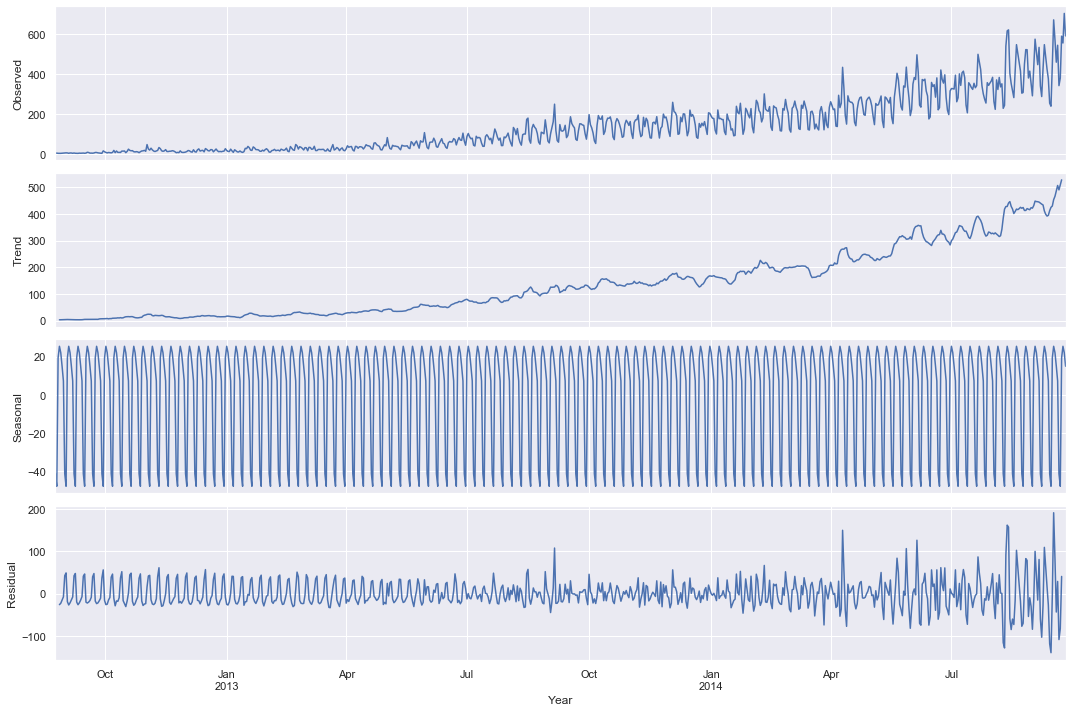

In [515]:
from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(train.Count)
decomposition = seasonal_decompose(train.Count, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
from pylab import rcParams

rcParams['figure.figsize'] =15, 10
fig = decomposition.plot()
plt.xlabel('Year')
plt.show()

# PHASE 3. Eliminating non-Stationarity or making TS data stationary

- Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

For more on non-stationarity property(Trending, seasonality,variance)
click -> https://otexts.com/fpp2/stationarity.html

##### There are three types of Moving Averages:
   - 1. Simple Moving Average: each Observation is given same weights
   - 2. Weighted Moving Average: recents observations are given more weight them older observerations
   - 3. Exponential Moving Average: same as second one
   
   
   - Purpose and benefit:
        - to remove the means that changes over time
        - These moving averages help to smooth the movements of the Prices/Number/Count and to filter out the “noise” (All the oscillations of the Prices that create false signals) . Moreover, you should remember that the longer the Period of the Moving Average is, the more will be delayed on the movements of the Prices; although the longer the Period of the Moving Average is, the more false signals will be avoided.
        
   - Drawback: 
        - if we put the Simple moving average and one of these Averages in the same chart, the Weighted or Exponential moving average will always be located above the Simple moving average during an Uptrend; whereas during a Downtrend, the Weighted or Exponential moving average will always be located below the Simple moving average.
        -  Better to first apply log transformation that also help to stabilise the variance of a time series.
        
   - WMA vs SMA vs EMA
       - WMA during an Uptrend, will act as a support for the movements of the Prices; whereas during a Downtrend, will act as a resistance for the movements of the Prices.
       - EMA during an Uptrend, will act as a more support for the movements of the Prices than WMA;whereas during a Downtrend, will act as a more resistance for the movements of the Prices than WMA.
       -  during an Uptrend, will act as a more support for the movements of the Prices than WMA;whereas during a Downtrend, will act as a more resistance for the movements of the Prices than WMA.


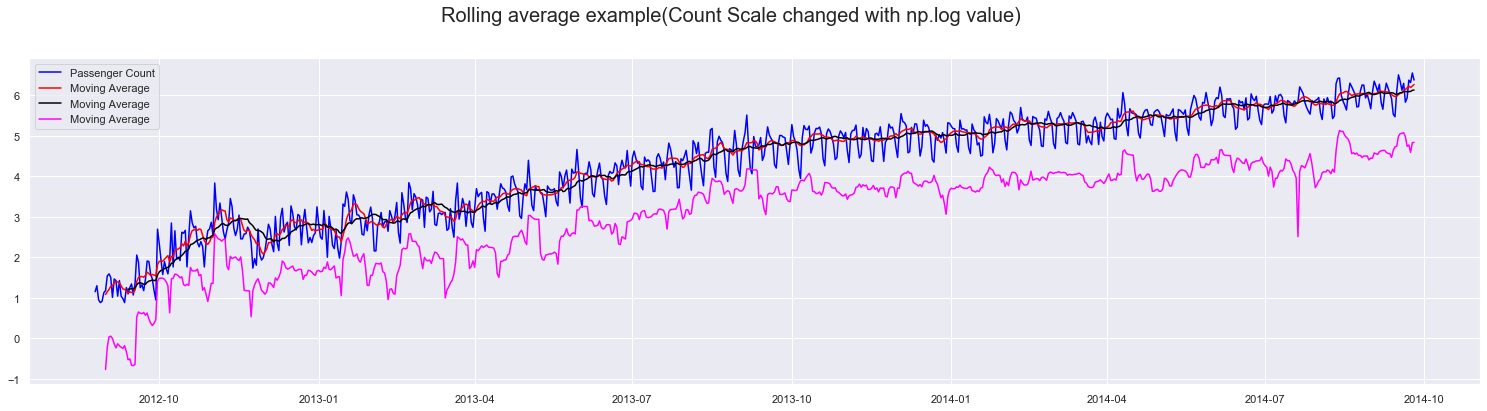

In [516]:
# Lets normalise the Count variable using no.log and check the trend
# Observe the Count Scale Changed with np.log but there is no change in the trend, 
# Sometime np.log transform the data from non-stationary to stationary but it did not happen
plt.figure(figsize=(26,6))
plt.suptitle("Rolling average example(Count Scale changed with np.log value)", y=1.0, fontsize=20)
plt.plot(np.log(train.Count),label='Passenger Count',color='blue' )
plt.plot(np.log(train.rolling(window=7).mean()),label='Moving Average',color='red' )
plt.plot(np.log(train.rolling(window=20).mean()),label='Moving Average',color='black' )
plt.plot(np.log(train.rolling(window=7).std()),label='Moving Average',color='magenta' )
plt.legend(loc='best')



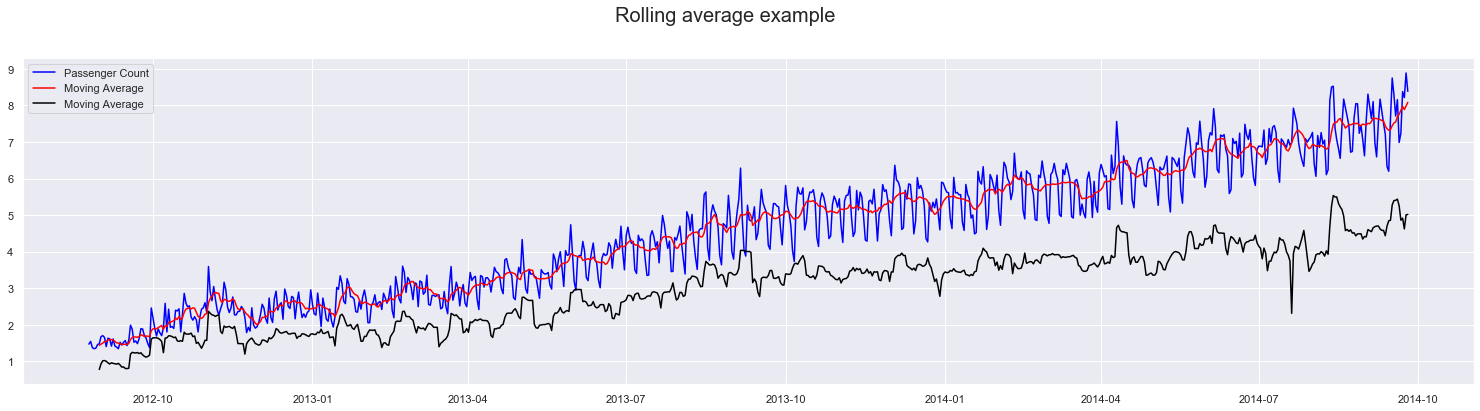

In [517]:
# Observe the Count Scale Changed with cuberoot but there is no change in the trend
# Sometime cube root transform the data from non-stationary to stationary but it did not happen
plt.figure(figsize=(26,6))
plt.suptitle("Rolling average example", y=1.0, fontsize=20)
plt.plot(np.power(train.Count,1/3),label='Passenger Count',color='blue' )
plt.plot(np.power(train.rolling(window=7).mean().dropna(),1/3),label='Moving Average',color='red' )
plt.plot(np.power(train.rolling(window=7).std().dropna(),1/3),label='Moving Average',color='black' )

plt.legend(loc='best')

In [518]:
data_deducted_moving_average= np.log(train) - np.log(train.rolling(window=7).mean().fillna(2))

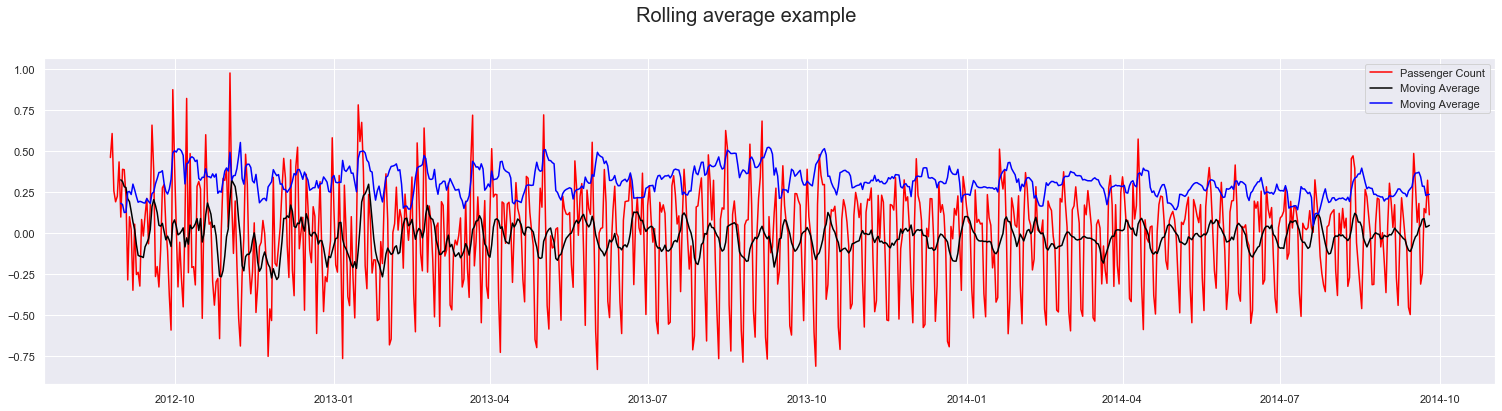

In [519]:
plt.figure(figsize=(26,6))
plt.suptitle("Rolling average example", y=1.0, fontsize=20)
plt.plot(data_deducted_moving_average.Count,label='Passenger Count',color='red' )
plt.plot(data_deducted_moving_average.rolling(window=7).mean(),label='Moving Average',color='black' )
plt.plot(data_deducted_moving_average.rolling(window=7).std(),label='Moving Average',color='blue' )
plt.legend(loc='best')

# # Observe here Trend is removing , Now data is stationary (divition is telling data is center around mean)

In [520]:
# lets us dickey adfuller test on this data
addfull= list(adfuller(data_deducted_moving_average.Count, autolag='AIC'))
addfulldict={}
def isStationary(tstats):
    if addfull[0] < 0.5:
        return 'stationary'
    else:
        return 'non-stationary'

addfulldict["test_statistcs"]= "%0.2f" %addfull[0]
addfulldict["p-value"]= "%0.2f" %addfull[1]
addfulldict["lags"]= addfull[2]
addfulldict["Number of observation"]=  addfull[3]
addfulldict["1% critical val"]= list(addfull[4].values())[0]
addfulldict["5% critical val"]= list(addfull[4].values())[1]
addfulldict["10% critical val"]= list(addfull[4].values())[2]
addfulldict["stationary or not"]= isStationary(addfull[0])
addfulldict
# observe test_statistcs is negative and p-values is 0

{'test_statistcs': '-6.86',
 'p-value': '0.00',
 'lags': 20,
 'Number of observation': 741,
 '1% critical val': -3.4392057325732104,
 '5% critical val': -2.8654483492874236,
 '10% critical val': -2.5688512291811225,
 'stationary or not': 'stationary'}

In [521]:
#data_deducted_moving_average_ewm =  np.log(train) - np.log(train.ewm(
#                halflife=12,min_periods=0,adjust=True).mean())

data_deducted_moving_average_ewm =  train - train.ewm(
                halflife=12,min_periods=0,adjust=True).mean()

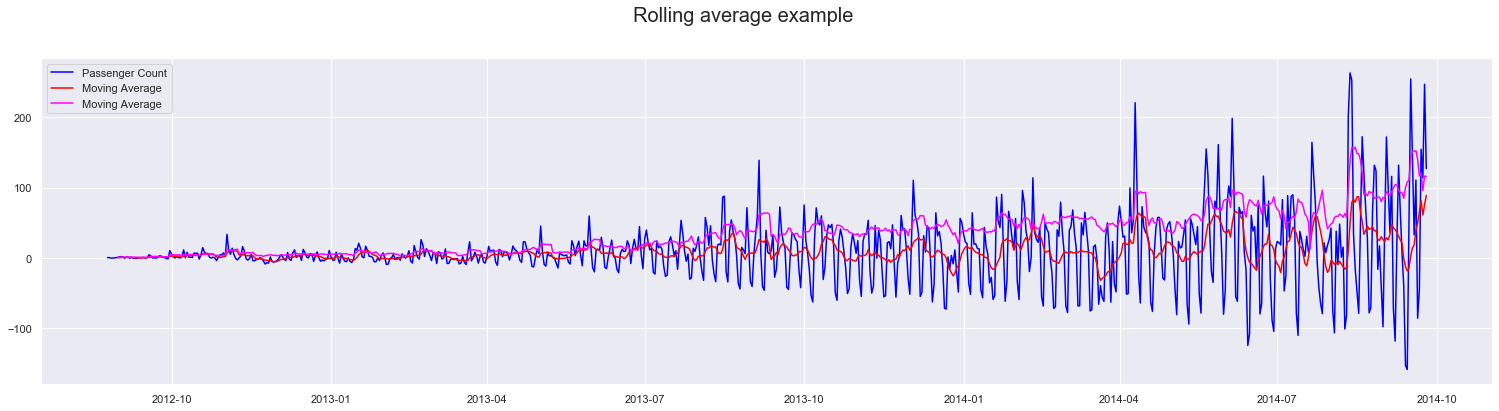

In [522]:
plt.figure(figsize=(26,6))
plt.suptitle("Rolling average example", y=1.0, fontsize=20)
plt.plot(data_deducted_moving_average_ewm.Count,label='Passenger Count',color='blue' )
plt.plot(data_deducted_moving_average_ewm.rolling(window=7).mean(),label='Moving Average',color='red' )
plt.plot(data_deducted_moving_average_ewm.rolling(window=7).std(),label='Moving Average',color='magenta' )
plt.legend(loc='best')
# diviation and mean line is rolling , that in fact better
# This also shows variations

In [523]:
# lets us dickey adfuller test on this data
addfull= list(adfuller(data_deducted_moving_average_ewm.Count, autolag='AIC'))
addfulldict={}
def isStationary(tstats):
    if addfull[0] < 0.5:
        return 'stationary'
    else:
        return 'non-stationary'

addfulldict["test_statistcs"]= "%0.2f" %addfull[0]
addfulldict["p-value"]= "%0.2f" %addfull[1]
addfulldict["lags"]= addfull[2]
addfulldict["Number of observation"]=  addfull[3]
addfulldict["1% critical val"]= list(addfull[4].values())[0]
addfulldict["5% critical val"]= list(addfull[4].values())[1]
addfulldict["10% critical val"]= list(addfull[4].values())[2]
addfulldict["stationary or not"]= isStationary(addfull[0])
addfulldict
# observe test_statistcs is negative and p-values is 0

{'test_statistcs': '-3.67',
 'p-value': '0.00',
 'lags': 20,
 'Number of observation': 741,
 '1% critical val': -3.4392057325732104,
 '5% critical val': -2.8654483492874236,
 '10% critical val': -2.5688512291811225,
 'stationary or not': 'stationary'}

In [524]:
# df.isnull().sum()

# Lets Decompose the TS and take Out Residual and filter out varying mean(trend) and Variation(seasonality)

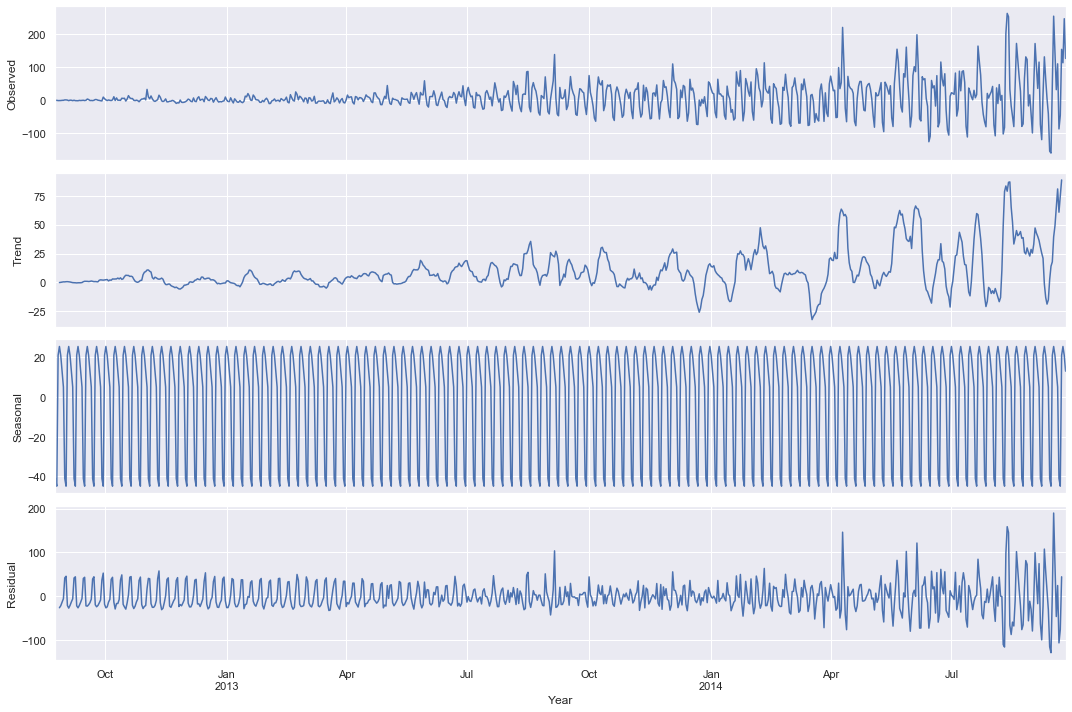

But since the series is not stationary, you will first use differencing before finding 
the parameters for the model.


In [525]:
from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(train.Count)
decomposition = seasonal_decompose(data_deducted_moving_average_ewm.Count, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
from pylab import rcParams

rcParams['figure.figsize'] =15, 10
fig = decomposition.plot()
plt.xlabel('Year')
plt.show()

print("""But since the series is not stationary, you will first use differencing before finding 
the parameters for the model.""")

# Let's split the train daily data into Train Data and valid Data

In [526]:
tmp = df.copy()
tmp['Datetime'] =  df.index
tmp['year'] =  tmp.Datetime.dt.year
tmp['month'] =  tmp.Datetime.dt.month
tmp.groupby(['year','month'])['month'].count()

year  month
2012  8        168
      9        720
      10       744
      11       720
      12       744
2013  1        744
      2        672
      3        744
      4        720
      5        744
      6        720
      7        744
      8        744
      9        720
      10       744
      11       720
      12       744
2014  1        744
      2        672
      3        744
      4        720
      5        744
      6        720
      7        744
      8        744
      9        600
Name: month, dtype: int64

# PHASE 4. As we have validated all our hypothesis, let’s go ahead and build models for Time Series Forecasting.

### Step 1) Splitting the data into training and validation part
Now we will divide our data in train and validation. We will make a model on the train part and predict on the validation part to check the accuracy of our predictions.

NOTE - It is always a good practice to create a validation set that can be used to assess our models locally. If the validation metric(rmse) is changing in proportion to public leaderboard score, this would imply that we have chosen a stable validation technique.

To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

- We have done time based validation here by selecting the last 3 months for the validation data and rest in the train data. If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.

- Lets understand it in this way: If we choose the split randomly it will take some values from the starting and some from the last years as well. It is similar to predicting the old values based on the future values which is not the case in real scenario. So, this kind of split is used while working with time related problems.


In [527]:
# as we have 25 months of data, 10% data = 3 month , we will separate out for validation
# If we would have done it randomly it will not work well for the train dataset 
# but will not work effectively on validation dataset.
# So, this kind of split is used only while working with time related problems.
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']

Text(0, 0.5, 'Passenger count')

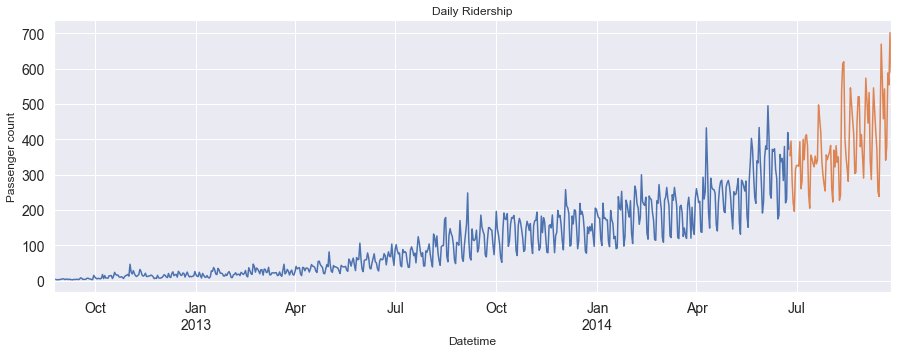

In [528]:
Train.Count.plot(figsize=(15,5), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,5), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
#plt.legend(loc='best') 


###  Lets create model

We will look at various models now to forecast the time series . Methods which we will be discussing for the forecasting are:

#### i) Naive Approach(most recent observation is the prediction)
##### ii) Moving Average(mean of last few observation is the prediction)
##### iii) Simple Exponential Smoothing( can handle irregularity)
##### iv) Holt’s Linear Trend Model ( only handle trend)
##### v) Exponential smoothing (best for seasonality,address trend to some extent)
##### vi) ARIMA (can handle both trend and seasonlity)
##### vii)  SARIMAX

# https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/


# MODEL 1. Naive Approach
 In this forecasting technique,Nothing is great, we just make the prediction by assuming that the next expected/prediction point is equal to the last observed point

In [529]:
train_naive = Train.copy()
valid_naive =  valid.copy()

In [530]:
last_observed_pointFromTrainData=train_naive.sort_values('Datetime',ascending=False).head(1).Count.values[0]
y_hat = valid.copy()
y_hat['naive_pred']=last_observed_pointFromTrainData
y_hat.sort_values('Datetime',ascending=False).head()

Count  naive_pred
Datetime                          
2014-09-25  589.666667  372.166667
2014-09-24  702.333333  372.166667
2014-09-23  554.333333  372.166667
2014-09-22  588.166667  372.166667
2014-09-21  379.250000  372.166667

Text(0.5, 1.0, 'Naive Forecast')

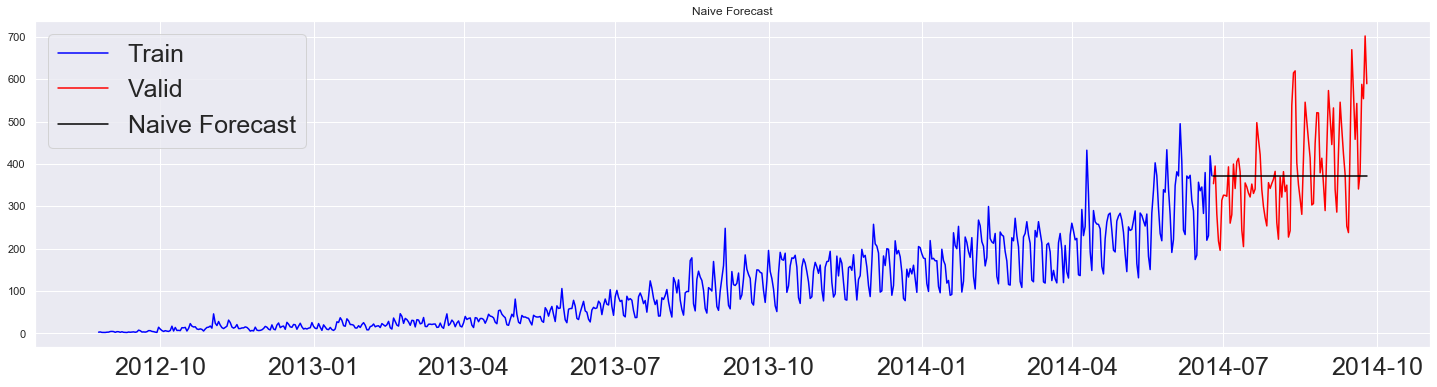

In [531]:
#Let's Plot it
plt.figure(figsize=(25,6)) 
plt.plot(Train.index, train_naive['Count'], label='Train',color='blue') 
plt.plot(valid.index,valid_naive['Count'], label='Valid',color='red') 
plt.plot(y_hat.index,y_hat['naive_pred'], label='Naive Forecast',color='black') 
plt.legend(loc='best',fontsize=25) 
plt.xticks(fontsize=25)
plt.title("Naive Forecast") 
# you will observe a straight line for naive forcasting in Black color

In [532]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive_pred)) 
print("Root mean Squared value of Naive ForeCasting:  %0.3f" %rms)

Root mean Squared value of Naive ForeCasting:  111.791


We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

# MODEL 2. Moving Average

A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles

In this technique we will take the average of the passenger counts for last few time periods only.

Here the predictions are made on the basis of the average of last few points instead of taking all the previously known values.

We will show rolling mean for last 10, 20, 50 days and visualize the results in next slide.

Let’s take an example to understand it:

Example
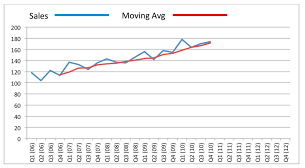


In [533]:
train_ma = Train.copy()
valid_ma =  valid.copy()
test_ma =  df_test.copy()
print(train_ma.shape)
print(train_ma['Count'].head(5).mean())
train_ma['Count'].rolling(5).mean().head(7)#.iloc[-1]

(669, 1)
2.8666666666666663


Datetime
2012-08-25         NaN
2012-08-26         NaN
2012-08-27         NaN
2012-08-28         NaN
2012-08-29    2.866667
2012-08-30    2.850000
2012-08-31    2.766667
Freq: D, Name: Count, dtype: float64

In [534]:
#2. Moving Average
#In this technique we will take the average of the passenger counts for last few time periods only.
y_hat_avg = valid.copy() 
# average of last 10 observations.
y_hat_avg['moving_avg_10obs_forecast'] = train_ma['Count'].rolling(window=10).mean().iloc[-1] 
# average of last 20 observations.
y_hat_avg['moving_avg_20obs_forecast'] = train_ma['Count'].rolling(window=20).mean().iloc[-1]
# average of last 40 observations. 
y_hat_avg['moving_avg_40obs_forecast'] = train_ma['Count'].rolling(40).mean().iloc[-1] 
# average of last 60 observations. 
y_hat_avg['moving_avg_60obs_forecast'] = train_ma['Count'].rolling(60).mean().iloc[-1] 
y_hat_avg.head()

Count  moving_avg_10obs_forecast  moving_avg_20obs_forecast  \
Datetime                                                                       
2014-06-25  353.666667                 313.033333                 319.916667   
2014-06-26  395.250000                 313.033333                 319.916667   
2014-06-27  282.333333                 313.033333                 319.916667   
2014-06-28  218.250000                 313.033333                 319.916667   
2014-06-29  196.250000                 313.033333                 319.916667   

            moving_avg_40obs_forecast  moving_avg_60obs_forecast  
Datetime                                                          
2014-06-25                 310.183333                 285.636111  
2014-06-26                 310.183333                 285.636111  
2014-06-27                 310.183333                 285.636111  
2014-06-28                 310.183333                 285.636111  
2014-06-29                 310.183333                 285.636111

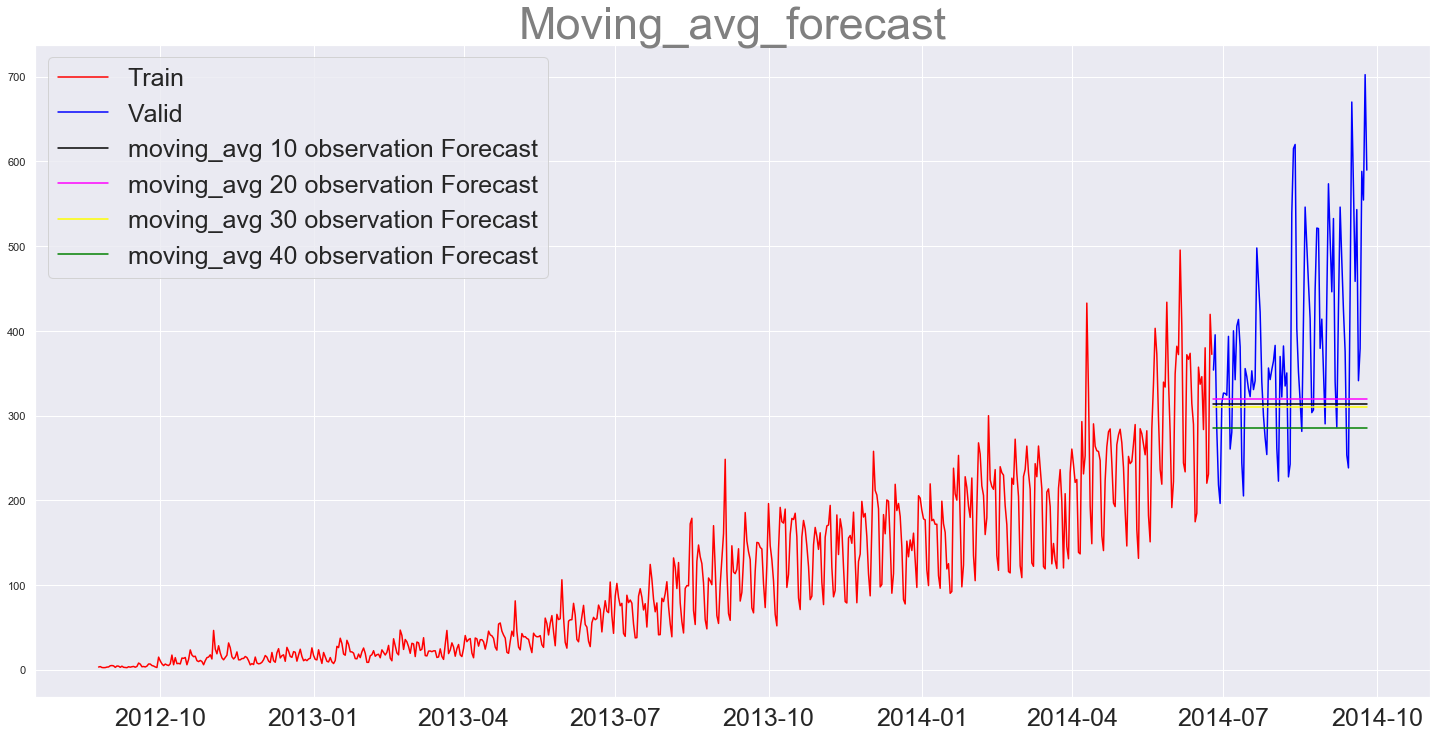

In [535]:
#Let's Plot it
plt.figure(figsize=(25,12)) 
plt.plot(Train.index, Train['Count'], label='Train',color='red') 
plt.plot(valid.index,valid['Count'], label='Valid',color='blue') 
plt.plot(y_hat_avg.index,y_hat_avg['moving_avg_10obs_forecast'], label='moving_avg 10 observation Forecast',color='black') 
plt.plot(y_hat_avg.index,y_hat_avg['moving_avg_20obs_forecast'], label='moving_avg 20 observation Forecast',color='magenta') 
plt.plot(y_hat_avg.index,y_hat_avg['moving_avg_40obs_forecast'], label='moving_avg 30 observation Forecast',color='Yellow') 
plt.plot(y_hat_avg.index,y_hat_avg['moving_avg_60obs_forecast'], label='moving_avg 40 observation Forecast',color='green') 
plt.legend(loc='best') 
plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.title("Moving_avg_forecast",fontsize=45,color='grey') 
# you will observe a straight line for naive forcasting
from sklearn.metrics import mean_squared_error 


In [536]:
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_10obs_forecast)) 
print("Root mean Squared value of  Moving Average Fore Casting:  %0.3f" %rms)
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_20obs_forecast)) 
print("Root mean Squared value of Moving Average Fore  ForeCasting:  %0.3f" %rms)
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_40obs_forecast)) 
print("Root mean Squared value of Moving Average Fore  ForeCasting:  %0.3f" %rms)
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_60obs_forecast)) 
print("Root mean Squared value of Moving Average Fore  ForeCasting:  %0.3f" %rms)


Root mean Squared value of  Moving Average Fore Casting:  134.237
Root mean Squared value of Moving Average Fore  ForeCasting:  130.450
Root mean Squared value of Moving Average Fore  ForeCasting:  135.877
Root mean Squared value of Moving Average Fore  ForeCasting:  151.489


In [537]:
train_exp = Train.copy()
valid_exp =  valid.copy()
test_exp =  df_test.copy()
#train.rolling(window=10).mean()

In [538]:
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing, Holt

#  MODEL 3. Simple/Single Exponential Smoothing Forecasting
# When to use?
# Few data points, Irregular data, No seasonality or trend.

### 3.1 Simple Exponential Smoothing Forecasting 
####   ( Similar to naive approach)

It is a time series forecasting method for univariate data without a trend or seasonality. It requires a single parameter, called alpha (a), also called the smoothing factor or smoothing coefficient.

1. In this technique, we assign larger weights to more recent observations than to  observations from the distant past.

2. The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

3. NOTE - here we give the entire weight to the last observed value only- (Recent observations),  this method will be similar to the naive approach. 

So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

Let’s look at an example of simple exponential smoothing:
    Just Recalling, SES only has one component called level (with a smoothing parameter denoted as “alpha” below). It is a weighted average of the previous level and the current observation:

In [539]:
train_ses = Train.copy()
y_hat_SES_avg =  valid.copy()
test_ses =  df_test.copy()
#y_hat_SES_avg = valid_ses.copy() 

In [540]:
# model building 
from statsmodels.tsa.api import SimpleExpSmoothing,ExponentialSmoothing 
SimpExpSmoothing = SimpleExpSmoothing(np.asarray(train_ses['Count']))
SimpExpSmoothing=SimpExpSmoothing.fit(smoothing_level=0.6,optimized=False) 

# making prediction for validation set
valid_ses_prediction = SimpExpSmoothing.forecast(len(y_hat_SES_avg))
y_hat_SES_avg['SES_predictions'] = valid_ses_prediction 

from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat_SES_avg.SES_predictions)) 
print("Root mean Squared value of Simple Exp Smoothing ForeCasting:  %0.3f" %rms)
print("\nParameter of SES algorithm:  \n\n %s" %SimpExpSmoothing.params )

"We can infer that the fit of the model has improved as the rmse value has reduced."

Root mean Squared value of Simple Exp Smoothing ForeCasting:  113.437

Parameter of SES algorithm:  

 {'smoothing_level': 0.6, 'smoothing_slope': None, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 3.1666666666666665, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


'We can infer that the fit of the model has improved as the rmse value has reduced.'

(array([734777., 734869., 734959., 735050., 735142., 735234., 735324.,
        735415., 735507.]), <a list of 9 Text xticklabel objects>)

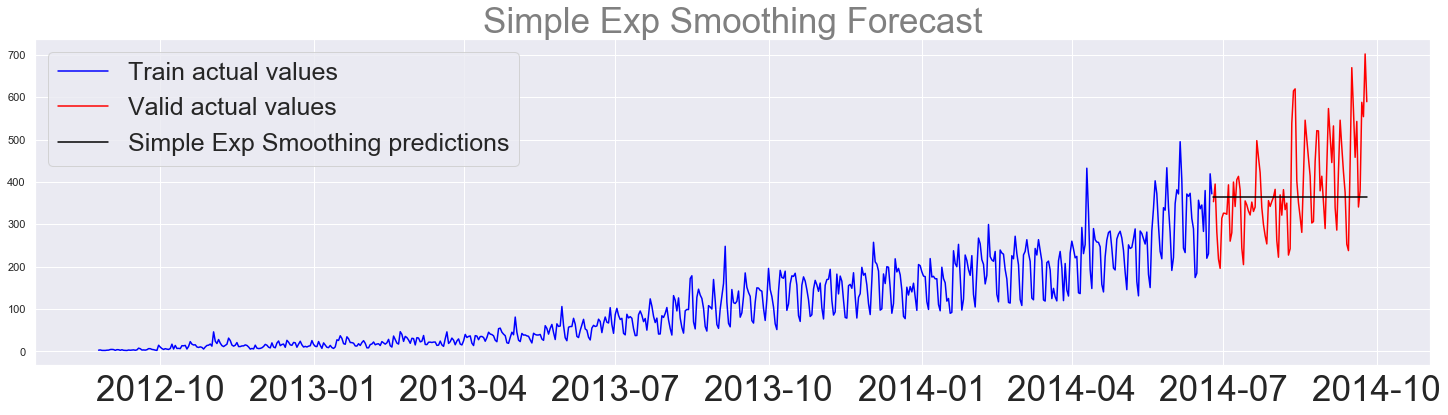

In [541]:
#Let's Plot Train actual values,Valid actual values, SES predictions
plt.figure(figsize=(25,6)) 
plt.plot(Train.index, train_ses['Count'], label='Train actual values',color='blue') 
plt.plot(valid.index,valid_ses['Count'], label='Valid actual values',color='red') 
plt.plot(y_hat_SES_avg.index,y_hat_SES_avg['SES_predictions'], label='Simple Exp Smoothing predictions',color='black') 
plt.title("Simple Exp Smoothing Forecast",color='grey',fontsize=35)
plt.legend(loc='best',fontsize=25) 
plt.xticks(fontsize=35) 
 
# you will observe a straight line for naive forcasting


# MODEL 4. Holt’s Linear Trend Model
#### Its extension of simple exponential smoothing to allow forecasting of data with a trend.
#### This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

# When to use?
# Trend in data, No seasonality.

It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.
First of all let us visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts.
1. Observed, which is the original time series.
2. Trend, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
3. Seasonal, which tells us about the seasonality in the time series.
4. Residual, which is obtained by removing any trend or seasonality in the time series.
Lets visualize all these parts.

In [542]:
train_Holt1 = Train.copy()
test_Holt1= df_test.copy()
df_dup = df.copy()
y_hat_Holt_avg = valid.copy() 

In [543]:
# Model building
from statsmodels.tsa.api import Holt
Holt_fit1 = Holt(np.asarray(train_Holt1['Count']))
Holt_fit1 = Holt_fit1.fit(smoothing_level = 0.3,smoothing_slope = 0.1)
print("Default parametes of Holt Algo:\n\n %s " %Holt_fit1.params)

# Prediction for validation set
prediction_4validset = Holt_fit1.forecast(len(valid))
y_hat_Holt_avg['predictions'] = prediction_4validset 

from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat_Holt_avg.predictions)) 
print("\n Root mean Squared value of Holt_linear Smoothing ForeCasting:  %0.3f" %rms)


Default parametes of Holt Algo:

 {'smoothing_level': 0.3, 'smoothing_slope': 0.1, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 2.9607271316882917, 'initial_slope': 0.05329534078691901, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False} 

 Root mean Squared value of Holt_linear Smoothing ForeCasting:  112.943


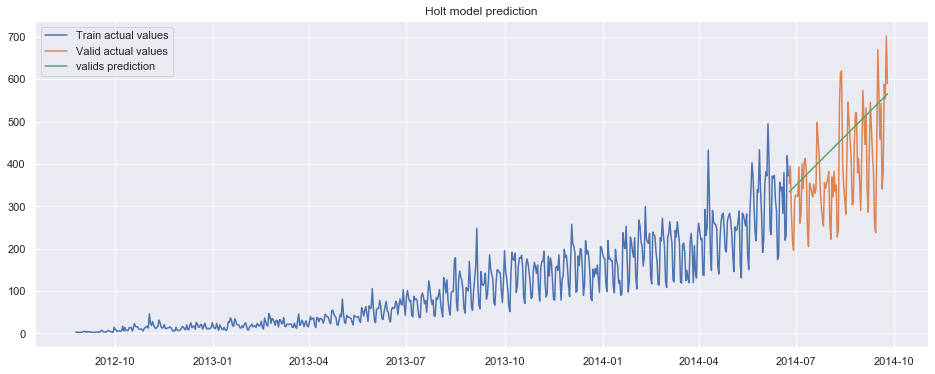

In [544]:

plt.figure(figsize=(16,6)) 
plt.plot(train_Holt1['Count'], label='Train actual values') 
plt.plot(valid['Count'], label='Valid actual values') 
plt.plot(y_hat_Holt_avg['predictions'], label='valids prediction') 
plt.title("Holt model prediction")
plt.legend(loc='best') 
plt.show()

In [545]:

# Now let’s try to make holt’s linear trend model on the daily time series and make predictions on the test dataset.

# 1. We will make predictions based on the daily time series and then will distribute that daily 
#    prediction to hourly predictions.
# 2. We have fitted the holt’s linear trend model on the train dataset and validated it using validation dataset.


In [546]:
# lets predict test data
predict_holt=Holt_fit1.forecast(len(test_Holt1))
test_Holt1['prediction']=predict_holt

# Remember this is the daily predictions. We have to convert these predictions to hourly basis. 

# * So first step to calculate the ratio of passenger count for each hour of every day. 
# * Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. 
# * Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.


In [547]:
# find the ratio of the hourly data 
# Calculated to convert daily prediction to hour prediction
df_dup['ratio']=df_dup['Count']/df_dup['Count'].sum()
temp=df_dup.groupby(['Hour'])['ratio'].sum()
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')
temp2=pd.read_csv('GROUPby.csv').drop('Hour.1',1)

In [548]:
# merge the test( with prediction dataset) with ratio dataset
predict_holt =pd.merge(test_Holt1, temp2, on='Hour', how='left') 

# let multiply the predictions with ratio in the test dataset
predict_holt['Count']=predict_holt['prediction']*predict_holt['ratio']*24

# lets drop use columns
submit_holt=predict_holt.drop(['year','day','month','Hour','day of week','ratio','prediction', 'weekend'],axis=1) 
def float2decimal(row):
    return "%0.2f" %row

# lets format the prediction upto two decimal places
submit_holt['Count']=submit_holt['Count'].apply(float2decimal)

# change the indexing from time to number
submit_holt.index = test_Holt1.index

# Converting the final submission to csv format pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')
pd.DataFrame(submit_holt, columns=['ID','Count']).to_csv('final_submit_unicorn_jetTrain_HoltAlgo.csv')

In [549]:
#df_test.ix['2014-09-26 00:00:00': '2014-09-27 05:00:00']
#df.ix['2014-09-24 00:00:00': '2014-09-26 00:00:00']

# MODEL 5. Exponential Smoothing model
# Support both Seanality and trend


# When to Use
# when data has a trend and seasonal data

In this technique, we assign larger weights to more recent observations than to observations from the distant past.


The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

Let’s look at an example of simple exponential smoothing:

Example: Here the predictions are made by assigning larger weight to the recent values and lesser weight to the old values.

##### Configuration parameters Exponential smoothing

trend: 
       The type of trend component, as either “add” for additive or “mul” for multiplicative. Modeling the trend
       can be disabled by setting it to None.
       
damped: 
        Whether or not the trend component should be damped, either True or False.

seasonal: 
        The type of seasonal component, as either “add” for additive or “mul” for multiplicative. Modeling the 
        seasonal component can be disabled by setting it to None.
           
seasonal_periods: 
        The number of time steps in a seasonal period, e.g. 12 for 12 months in a yearly seasonal 
        structure (more here).
        The model can then be fit on the training data by calling the fit() function.

This function allows you to either specify the smoothing coefficients of the exponential smoothing model or 
        have them optimized. By default, they are optimized (e.g. optimized=True). 


You can Use Following params with fitting method while training the model
These coefficients include:

1. smoothing_slope (beta): the smoothing coefficient for the trend.
    
2. damping_slope (phi): the coefficient for the damped trend.

3. smoothing_level (alpha): the smoothing coefficient for the level.

4. smoothing_seasonal (gamma): the smoothing coefficient for the seasonal component.

Additionally, the fit function can perform basic data preparation prior to modeling; specifically:


5. use_boxcox: Whether or not to perform a power transform of the series (True/False) or 
                specify the lambda for the transform.
                



In [550]:
train_exp= Train.copy()
test_exp= df_test.copy()
y_hat_avg_exp= valid.copy() 


Root mean Squared value of Exponential Smoothing ForeCasting:  82.379


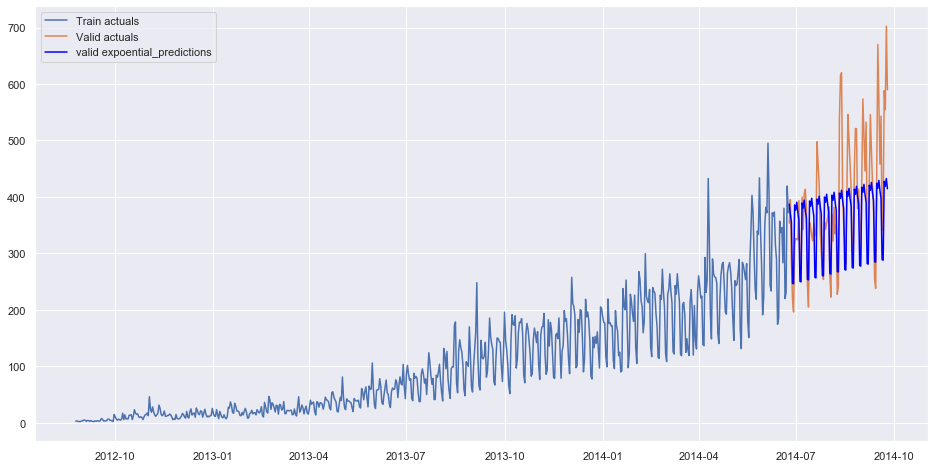

In [551]:
# modeling bulding
exp_smooth_fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 

# makeing prediction on validation data set
valid_predictions_exp = exp_smooth_fit1.forecast(len(valid)) 
y_hat_avg_exp['prediction']=valid_predictions_exp

# RMSE of modeling
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg_exp.prediction)) 
print("Root mean Squared value of Exponential Smoothing ForeCasting:  %0.3f" %rms)

# plot train actual actual , valids actual values,valids predicted values 
plt.figure(figsize=(16,8)) 
plt.plot(train_exp['Count'], label='Train actuals')
plt.plot(y_hat_avg_exp['Count'], label='Valid actuals') 
plt.plot(y_hat_avg_exp['prediction'], label='valid expoential_predictions',color='blue') 
plt.legend(loc='best') 
plt.show()


In [552]:
predictions_exp = exp_smooth_fit1.forecast(len(test_exp)) 
test_exp['prediction']= predictions_exp

#predictions_exp =pd.merge(y_hat_avg_exp, temp2, on='Hour', how='left') 
#predictions_exp

In [553]:
# merge the test( with prediction dataset) with ratio dataset
predict_exp =pd.merge(test_exp, temp2, on='Hour', how='left') 

# let multiply the predictions with ratio in the test dataset
predict_exp['Count']=predict_exp['prediction']*predict_exp['ratio']*24

# lets drop use columns
submit_exp=predict_exp.drop(['year','day','month','Hour','day of week','ratio','prediction', 'weekend'],axis=1) 
def float2decimal(row):
    return "%0.2f" %row

# lets format the prediction upto two decimal places
submit_exp['Count']=submit_exp['Count'].apply(float2decimal)

# change the indexing from time to number
submit_exp.index = test_Holt1.index

# Converting the final submission to csv format pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')
pd.DataFrame(submit_exp, columns=['ID','Count']).to_csv('final_submit_unicorn_jetTrain_ExpSmoothingAlgo.csv')

# MODEL 6. ARIMA MODEL

# Forecasting the time series using ARIMA

Note: Arima is not the good fit , there is seasonality in data...better to use Seasonal-ARIMA

 First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

p = AR/- The number of lag observations included in the model, also called the lag order.
d = difference/integration/- The number of times that the raw observations are differenced, also called the degree of differencing.
q = MA/ - The size of the moving average window, also called the order of moving average.
  

To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and  PACF(Partial Autocorrelation Function) graph.

1. ACF is a measure of the correlation between the TimeSeries with a lagged version of itself and is used to find the value of MA lags. This plot will shows there is sudden drop and but values are less likely to go negative.

2. PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons and is used to find the values of AR lags.
    This plot will should the sudden drop and values dangeling between negative and positive with in a limit
    
    
 A value of 0 can be used for a parameter, which indicates to not use that element of the model. 
#This way, the ARIMA model can be configured to perform the function of an ARMA model, and  even a simple AR, I, or MA model.

#A linear regression model is constructed including the specified number and type of terms, and
#The data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.


In [556]:
# Why do we have to make the time series stationary?

# We make the series stationary to make the variables independent. 
# Variables can be dependent in various ways, but can only be independent in one way. 
# So, we will get more information when they are independent. Hence the time series must be stationary.

# If the time series is not stationary, firstly we have to make it stationary. 
# For doing so, we need to remove the trend and seasonality from the data. 

# * * * Identify of stationarity in dataset* * *

# Note

# Before Applying ARIMA model make sure data is stationary 
# As we know, non-stationary data has 4 components
#             (trend ,seasonality, residual, cyclic) 
# 1. Use plot to test the stationarity
# 2. Use adfuller test 



1. use ploting to test stationarity in dataset(moving Average)


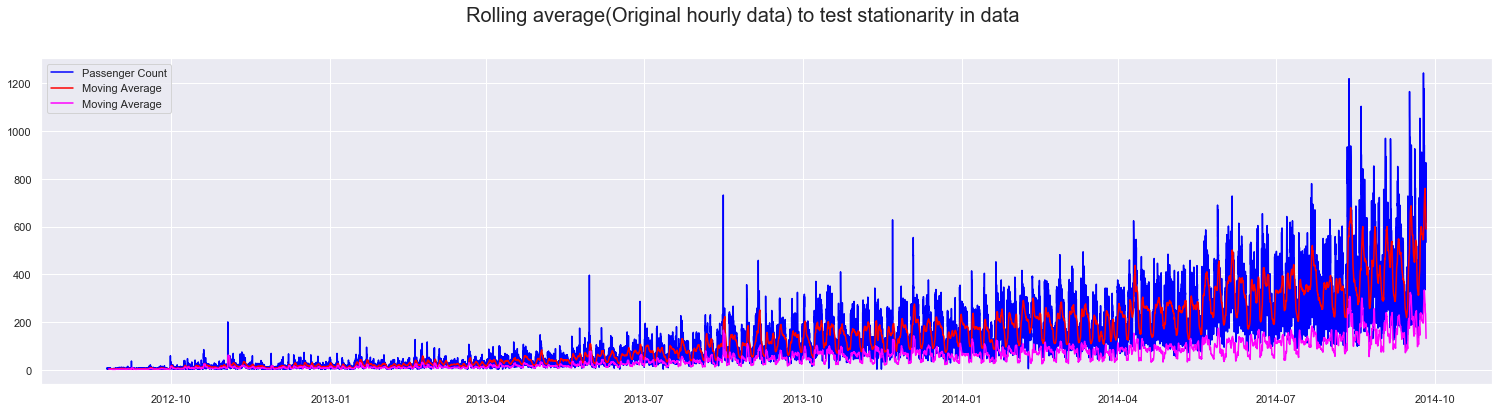

In [557]:
# Use plot to identify stationarity in data
print("1. use ploting to test stationarity in dataset(moving Average)")
plt.figure(figsize=(26,6))
plt.suptitle("Rolling average(Original hourly data) to test stationarity in data", y=1.0, fontsize=20)
plt.plot(df.Count,label='Passenger Count',color='blue' )
plt.plot(df.Count.rolling(window=24).mean(),label='Moving Average',color='red' )
plt.plot(df.Count.rolling(window=24).std(),label='Moving Average',color='magenta' )
plt.legend(loc='best')
# diviation and mean line is rolling , that in fact better

In [558]:
print("1. adfuller test to test stationarity in dataset")
# As decomposer remove the trend and seasonality 
# lets us perform dickey adfuller test on this residual_d to check stationary transformation done or not
addfull= list(adfuller(df.Count, autolag='AIC'))
addfulldict={}
def isStationary(tstats):
    if addfull[0] < 0.5:
        return 'stationary'
    else:
        return 'non-stationary'

addfulldict["test_statistcs"]= "%0.2f" %addfull[0]
addfulldict["p-value"]= "%0.2f" %addfull[1]
addfulldict["lags"]= addfull[2]
addfulldict["Number of observation"]=  addfull[3]
addfulldict["1% critical val"]= list(addfull[4].values())[0]
addfulldict["5% critical val"]= list(addfull[4].values())[1]
addfulldict["10% critical val"]= list(addfull[4].values())[2]
addfulldict["stationary or not"]= isStationary(addfull[0])
addfulldict
# observe test_statistcs is negative and p-values is 0, it means data is stationary
# As per graph there is still some trend and seasonality

# Let try to eliminate


1. adfuller test to test stationarity in dataset


{'test_statistcs': '-4.46',
 'p-value': '0.00',
 'lags': 45,
 'Number of observation': 18242,
 '1% critical val': -3.430708525404171,
 '5% critical val': -2.861698454786869,
 '10% critical val': -2.5668543412994906,
 'stationary or not': 'stationary'}

# Identify Trend and Seasonality both from train and validation dataset

1. use ploting to test stationarity in dataset(moving Average)


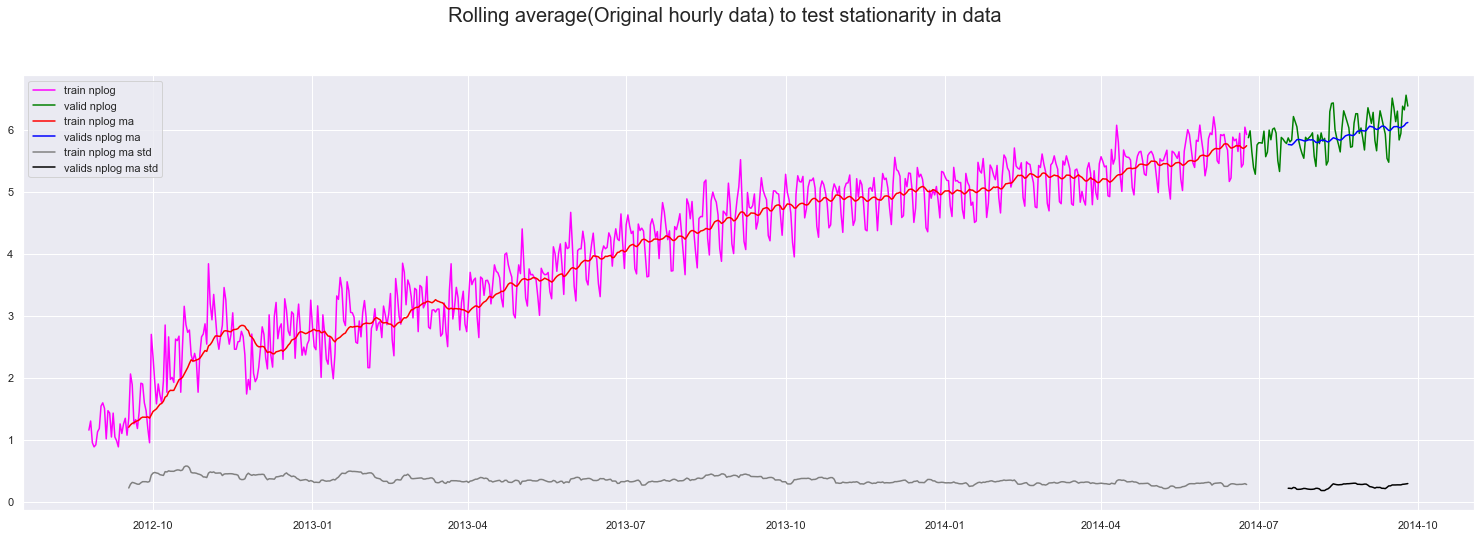

In [559]:
# Use np Log to removing the trend both from train and validation dataset
train_arima_log= pd.DataFrame(np.log(Train.Count),index=Train.index)
valid_arima_log= pd.DataFrame(np.log(valid.Count),index=valid.index)

# Use plot to identify stationarity in data
print("1. use ploting to test stationarity in dataset(moving Average)")
plt.figure(figsize=(26,8))
plt.suptitle("Rolling average(Original hourly data) to test stationarity in data", y=1.0, fontsize=20)
#plt.plot(Train.Count,label='Train Count',color='blue' )
#plt.plot(valid.Count,label='valid Count',color='black' )
plt.plot(train_arima_log.Count,label='train nplog',color='magenta' )
plt.plot(valid_arima_log.Count,label='valid nplog',color='green' )
plt.plot(train_arima_log.Count.rolling(window=24).mean(),label='train nplog ma',color='red' )
plt.plot(valid_arima_log.Count.rolling(window=24).mean(),label='valids nplog ma',color='blue' )
plt.plot(train_arima_log.Count.rolling(window=24).std(),label='train nplog ma std',color='grey' )
plt.plot(valid_arima_log.Count.rolling(window=24).std(),label='valids nplog ma std',color='black' )
plt.legend(loc='best')
# diviation and mean line is rolling , that in fact better

# Eliminate Trend 1 both from train and validation dataset

1. use ploting to test stationarity in dataset(moving Average)


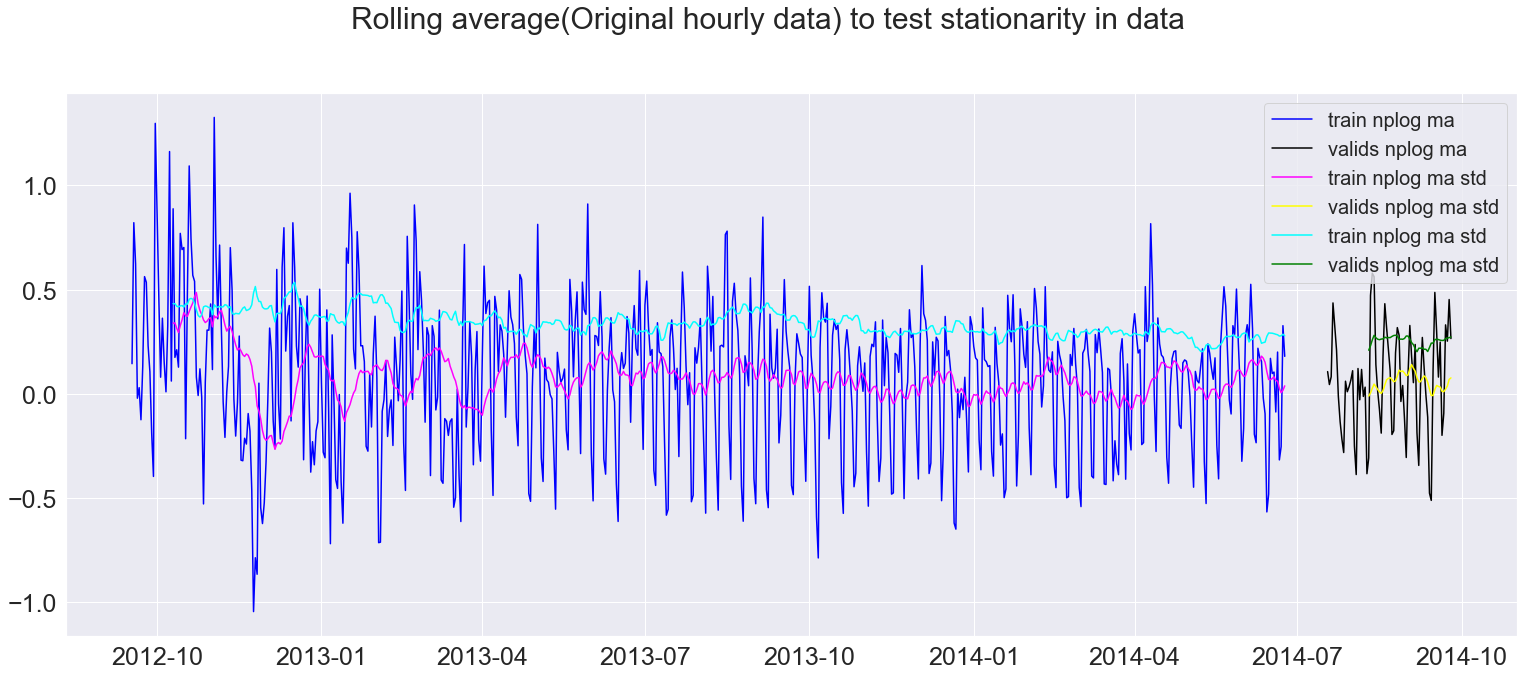

In [560]:
# Let remote the trend and plot the graph

train_arima_log_withoutMA = train_arima_log - train_arima_log.rolling(window=24).mean() 
valid_arima_log_withoutMA = valid_arima_log - valid_arima_log.rolling(window=24).mean() 

# Use plot to identify stationarity in data
print("1. use ploting to test stationarity in dataset(moving Average)")
plt.rc('xtick', labelsize=25)     
plt.rc('ytick', labelsize=25)
plt.figure(figsize=(26,10))
plt.rc('legend',fontsize=20) # using a size in points
plt.suptitle("Rolling average(Original hourly data) to test stationarity in data", y=1.0, fontsize=30)
#plt.plot(Train.Count,label='Train Count',color='blue' )
#plt.plot(valid.Count,label='valid Count',color='black' )
#plt.plot(train_arima_log.Count,label='train nplog',color='red' )
#plt.plot(valid_arima_log.Count,label='valid nplog',color='grey' )
plt.plot(train_arima_log_withoutMA.Count,label='train nplog ma',color='blue' )
plt.plot(valid_arima_log_withoutMA.Count,label='valids nplog ma',color='black' )
plt.plot(train_arima_log_withoutMA.Count.rolling(window=24).mean(),label='train nplog ma std',color='magenta' )
plt.plot(valid_arima_log_withoutMA.Count.rolling(window=24).mean(),label='valids nplog ma std',color='yellow' )
plt.plot(train_arima_log_withoutMA.Count.rolling(window=24).std(),label='train nplog ma std',color='cyan' )
plt.plot(valid_arima_log_withoutMA.Count.rolling(window=24).std(),label='valids nplog ma std',color='green' )
plt.legend(loc='best')

# diviation and mean line is rolling , that in fact better

# Eliminate Trend 2 both from the Train Dataset and validation Dataset
# It will Stabilise the mean ( use logshift)

1. use ploting to test stationarity in dataset(moving Average)


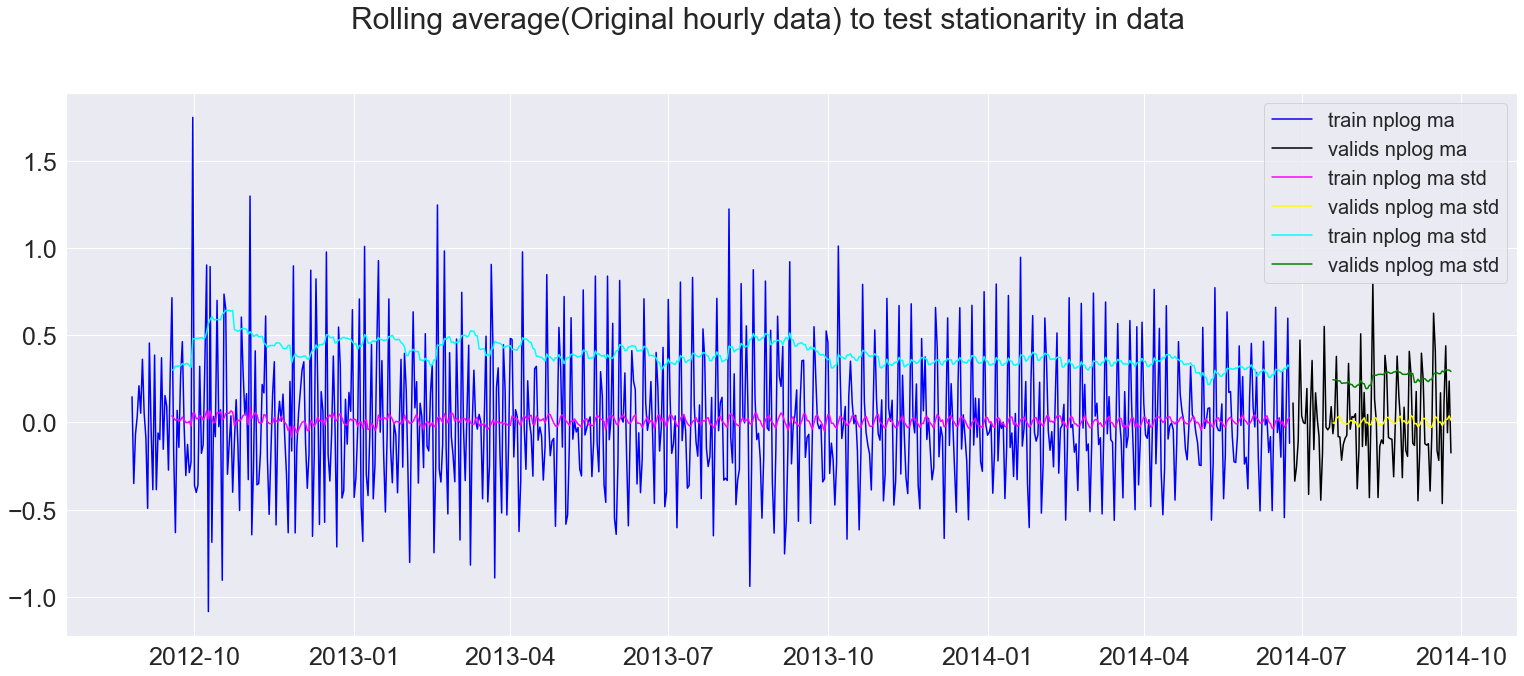

In [561]:
# Let remote the trend and plot the graph
train_arima_log_withoutSeanality = train_arima_log - train_arima_log.shift(1) 
valid_arima_log_withoutSeanality = valid_arima_log - valid_arima_log.shift(1) 

# Use plot to identify stationarity in data
print("1. use ploting to test stationarity in dataset(moving Average)")
plt.rc('xtick', labelsize=25)     
plt.rc('ytick', labelsize=25)
plt.figure(figsize=(26,10))
plt.rc('legend',fontsize=20) # using a size in points
plt.suptitle("Rolling average(Original hourly data) to test stationarity in data", y=1.0, fontsize=30)
#plt.plot(Train.Count,label='Train Count',color='blue' )
#plt.plot(valid.Count,label='valid Count',color='black' )
#plt.plot(train_arima_log.Count,label='train nplog',color='red' )
#plt.plot(valid_arima_log.Count,label='valid nplog',color='grey' )
plt.plot(train_arima_log_withoutSeanality.Count,label='train nplog ma',color='blue' )
plt.plot(valid_arima_log_withoutSeanality.Count,label='valids nplog ma',color='black' )
plt.plot(train_arima_log_withoutSeanality.Count.rolling(window=24).mean(),label='train nplog ma std',color='magenta' )
plt.plot(valid_arima_log_withoutSeanality.Count.rolling(window=24).mean(),label='valids nplog ma std',color='yellow' )
plt.plot(train_arima_log_withoutSeanality.Count.rolling(window=24).std(),label='train nplog ma std',color='cyan' )
plt.plot(valid_arima_log_withoutSeanality.Count.rolling(window=24).std(),label='valids nplog ma std',color='green' )
plt.legend(loc='best')


# Lets Eliminate Seasonality using Seasonal_decompose statsmodel lib

In [562]:
train_arima = Train.copy()
test_arima= df_test.copy()

<Figure size 1872x432 with 0 Axes>

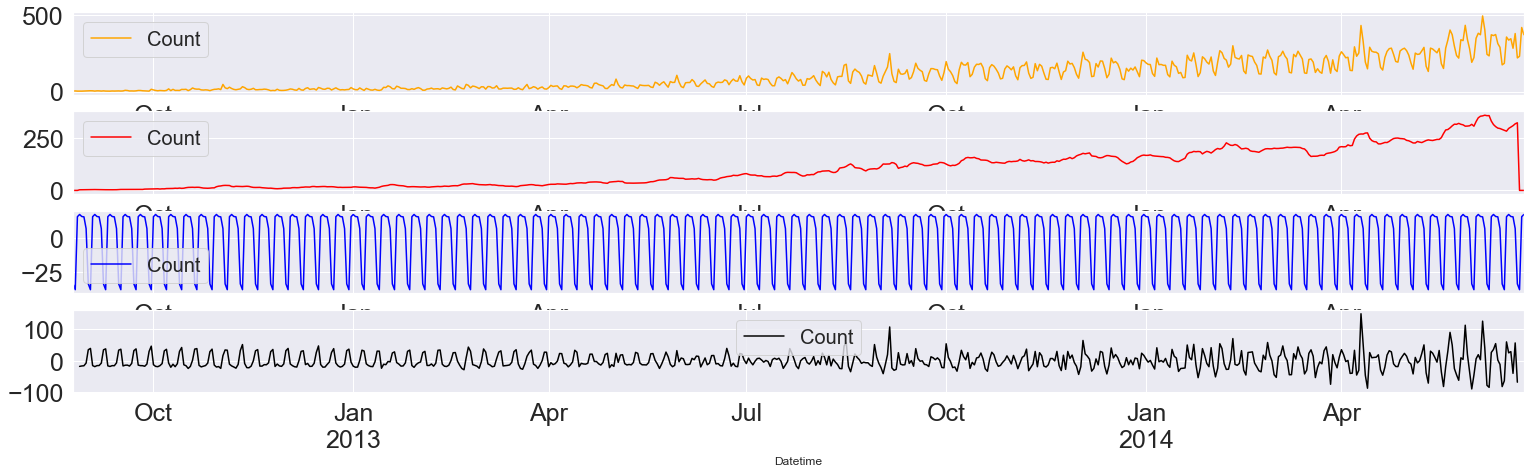

In [563]:
decompostion = seasonal_decompose(train_arima)

plt.figure(figsize=(26,6))
fig,axs = plt.subplots(4,1)
decompostion.observed.plot(figsize=(26,7),ax=axs[0],color='orange',label='observed')
decompostion.trend.fillna(0).plot(figsize=(26,7),ax=axs[1],color='red',label='trend')
decompostion.seasonal.plot(ax=axs[2],color='blue',label='seasonal')
decompostion.resid.plot(ax=axs[3],color='black',label='residual')
#decompostion.plot()

In [564]:
residual_d=pd.pandas.DataFrame(decompostion.resid).dropna()


In [566]:
print("1. adfuller test to test stationarity in dataset")
# As decomposer remove the trend and seasonality 
# lets us perform dickey adfuller test on this residual_d to check stationary transformation done or not
addfull= list(adfuller(residual_d.Count, autolag='AIC'))
addfulldict={}
def isStationary(tstats):
    if addfull[0] < 0.5:
        return 'stationary'
    else:
        return 'non-stationary'

addfulldict["test_statistcs"]= "%0.2f" %addfull[0]
addfulldict["p-value"]= "%0.2f" %addfull[1]
addfulldict["lags"]= addfull[2]
addfulldict["Number of observation"]=  addfull[3]
addfulldict["1% critical val"]= list(addfull[4].values())[0]
addfulldict["5% critical val"]= list(addfull[4].values())[1]
addfulldict["10% critical val"]= list(addfull[4].values())[2]
addfulldict["stationary or not"]= isStationary(addfull[0])
addfulldict
# observe test_statistcs is negative and p-values is 0, it means data is stationary
# As per graph there is still some trend and seasonality

# Let try to eliminate


1. adfuller test to test stationarity in dataset


{'test_statistcs': '-9.36',
 'p-value': '0.00',
 'lags': 20,
 'Number of observation': 642,
 '1% critical val': -3.4405768522418607,
 '5% critical val': -2.8660524488494903,
 '10% critical val': -2.569173076930542,
 'stationary or not': 'stationary'}

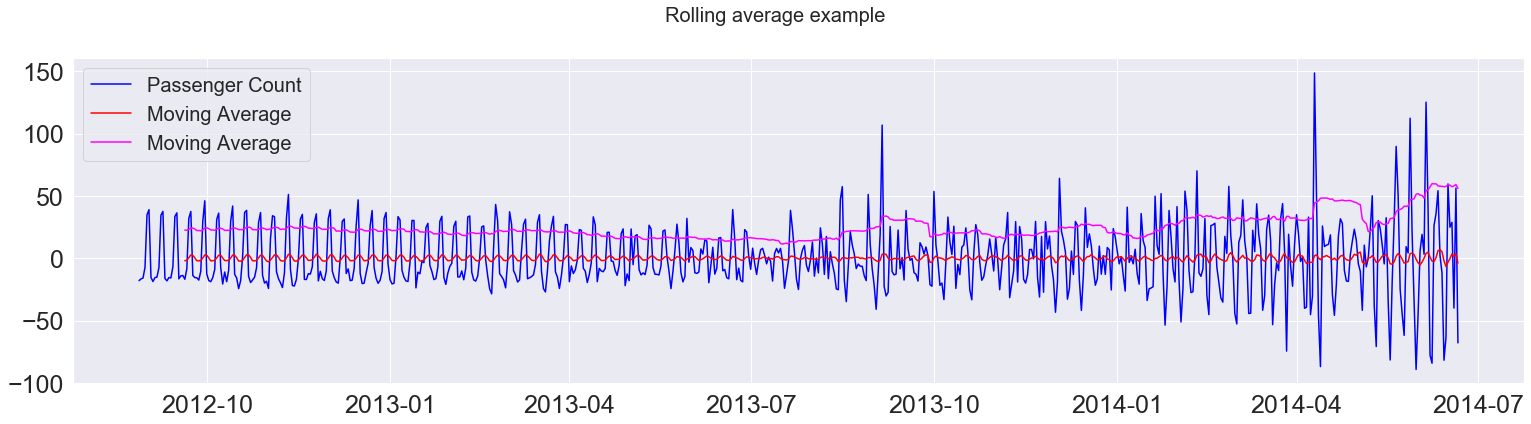

In [567]:
# Lets check whether all the non-stationary 4 components(trend ,seasonality, residual, cyclic) in the dataset
# resid are the outliers and noise using plot

plt.figure(figsize=(26,6))
plt.suptitle("Rolling average example", y=1.0, fontsize=20)
plt.plot(residual_d.Count,label='Passenger Count',color='blue' )
plt.plot(residual_d.Count.rolling(window=24).mean(),label='Moving Average',color='red' )
plt.plot(residual_d.Count.rolling(window=24).std(),label='Moving Average',color='magenta' )
plt.legend(loc='best')
# diviation and mean line is rolling , that in fact better

# Use Trend 2 output and plot ACF and PACF (To get Q and P value from it)

In [568]:
# Before Arima building model lets create Auto correlation and partial AC function 
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_arima_log_withoutSeanality.dropna(), nlags=25) 
lag_pacf = pacf(train_arima_log_withoutSeanality.dropna(), nlags=25, method='ols')


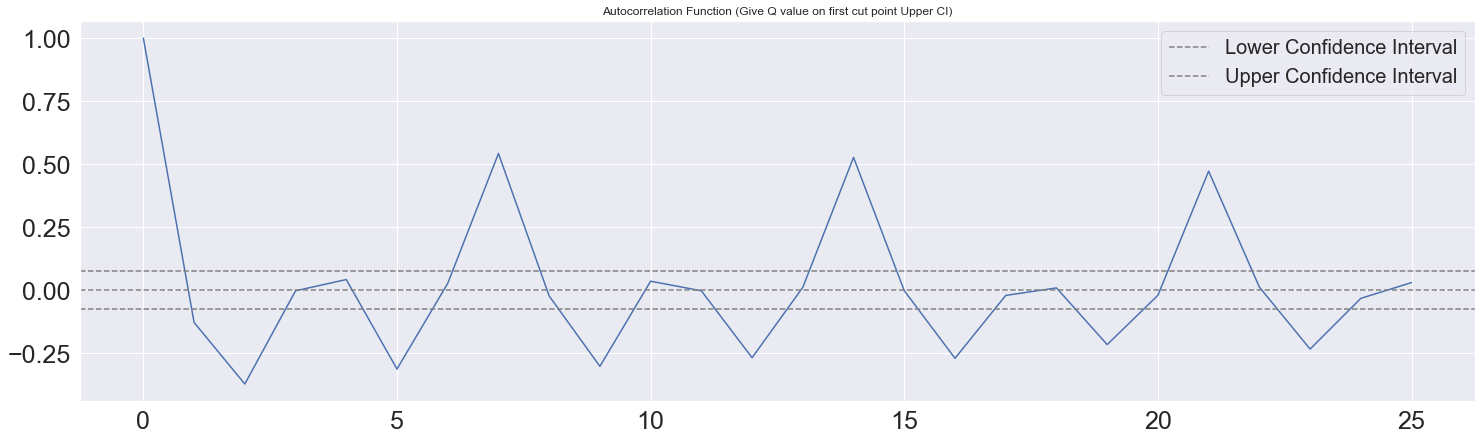

In [569]:
# Lets plot Autocorrelation Function
figure = plt.figure(figsize=(25,7))
plt.rc('xtick', labelsize=25)     
plt.rc('ytick', labelsize=25)
plt.rc('legend',fontsize=20) # using a size in points
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_arima_log_withoutSeanality.dropna())),linestyle='--',color='gray',label='Lower Confidence Interval') 
plt.axhline(y=1.96/np.sqrt(len(train_arima_log_withoutSeanality.dropna())),linestyle='--',color='gray',label='Upper Confidence Interval') 
plt.title('Autocorrelation Function (Give Q value on first cut point Upper CI)') 
plt.legend(loc='best')


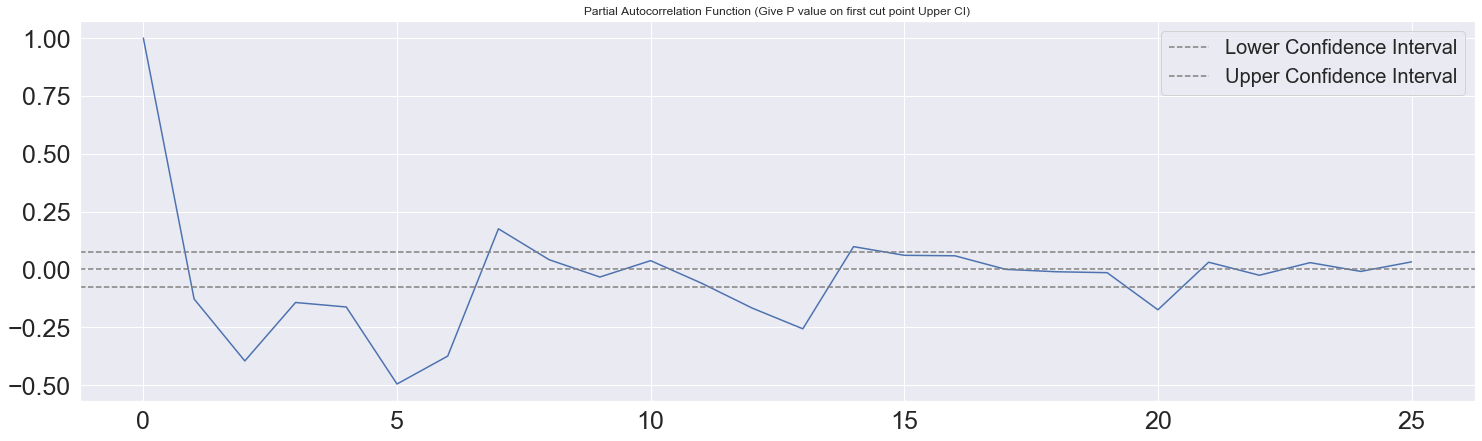

In [570]:
# Lets plot Partial Autocorrelation Function
figure = plt.figure(figsize=(25,7))
plt.rc('xtick', labelsize=25)     
plt.rc('ytick', labelsize=25)
plt.rc('legend',fontsize=20) # using a size in points
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_arima_log_withoutSeanality.dropna())),linestyle='--',color='gray',label='Lower Confidence Interval') 
plt.axhline(y=1.96/np.sqrt(len(train_arima_log_withoutSeanality.dropna())),linestyle='--',color='gray',label='Upper Confidence Interval') 
plt.title('Partial Autocorrelation Function (Give P value on first cut point Upper CI)') 
plt.legend(loc='best')

# AR Model building

In [571]:
# Lets build AR MODEL
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_arima_log.dropna(), order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
#results_AR.summary()
#results_AR.resid
#results_AR.fittedvalues
pd.DataFrame()

Empty DataFrame
Columns: []
Index: []

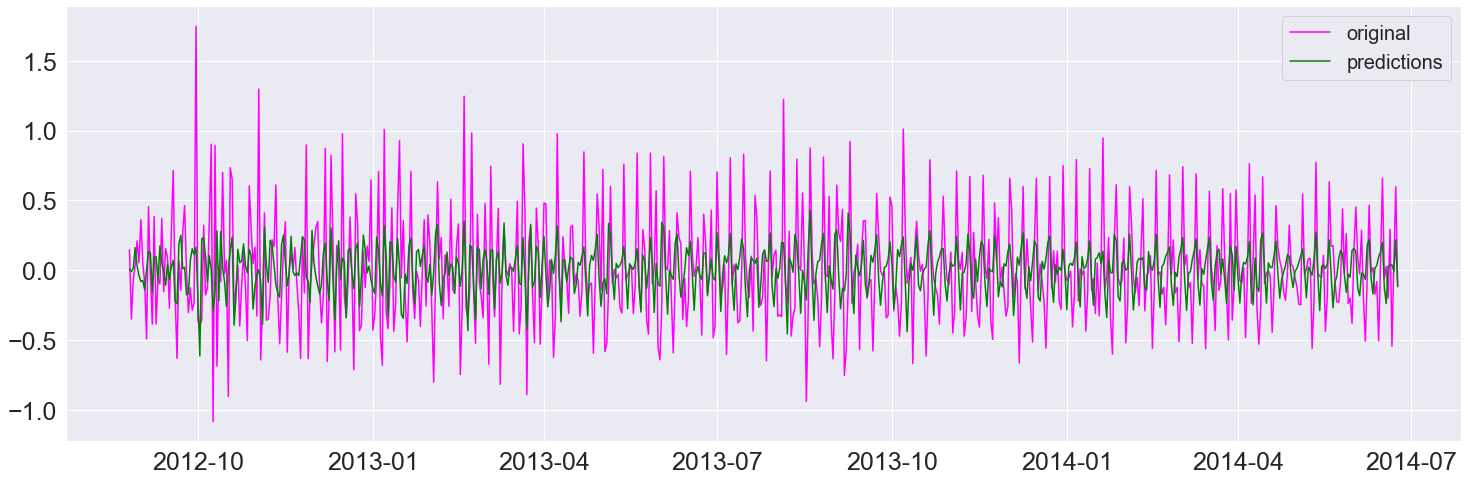

In [572]:
figure=plt.figure(figsize=(25,8))
plt.plot(train_arima_log_withoutSeanality.dropna(), label='original',color='magenta') 
plt.plot(results_AR.fittedvalues, color='green', label='predictions') 
#plt.plot(results_AR.resid, color='green', label='predictions') 
plt.legend(loc='best') 

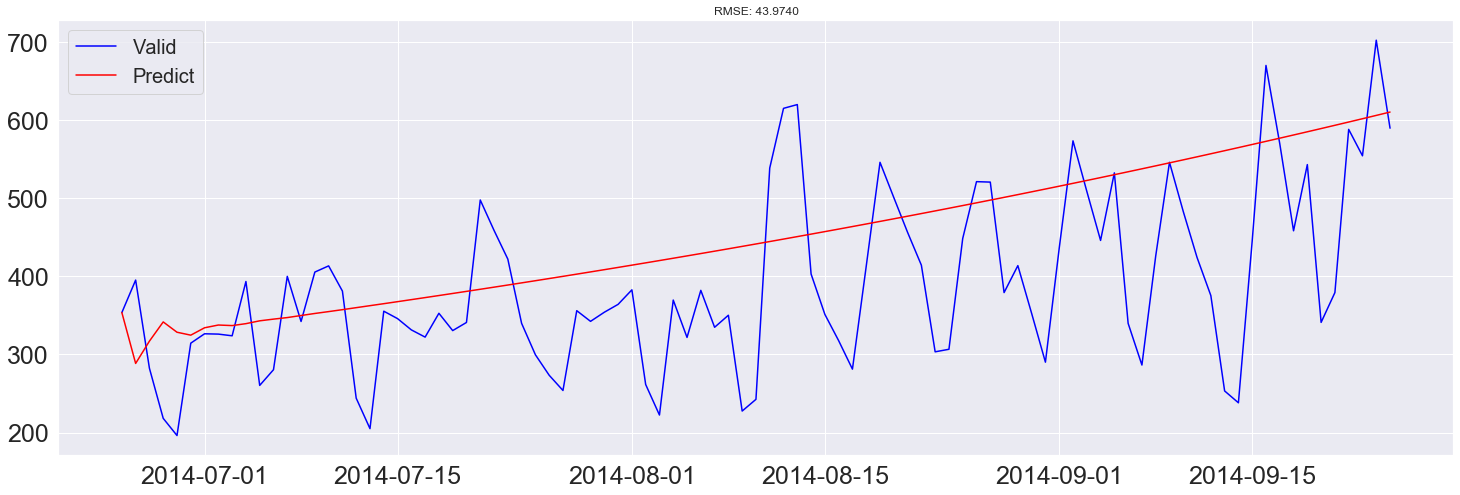

In [573]:
#Lets plot the validation curve for AR model.

#We have to change the scale of the model to the original scale.

# First step would be to store the predicted results as a separate series and observe it.

# While using Arima_mode.predict() , you need to specify the start and end dates. It would return an array 
#    that contains the predictions.

# The Arima .forecast() function requires the number of values for which the predictions have to be made.

# specify date range for prediction
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25").cumsum().shift().fillna(0) 

#  prepare validatation Set
validation_set=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 

# predicted data
AR_predict = np.exp(validation_set.add(AR_predict,fill_value=0))

figure=plt.figure(figsize=(25,8))
plt.plot(valid['Count'], label = "Valid",color='blue') 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0])) 
plt.show()

# MA Model building

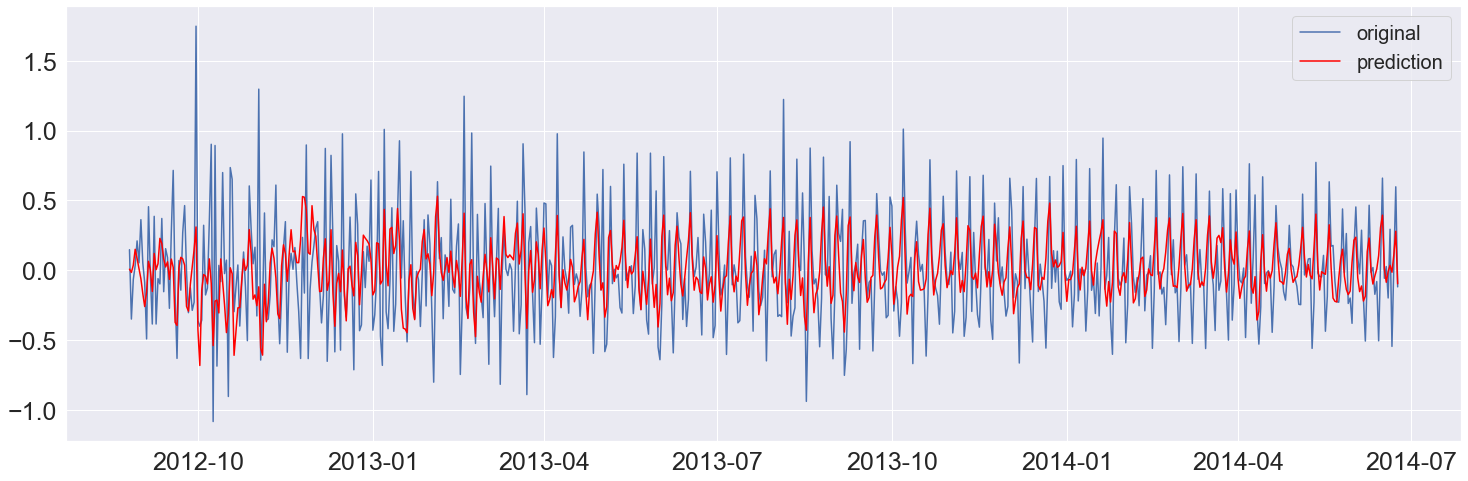

In [574]:
#MA model
# The moving-average model specifies that the output variable depends linearly on the current and 
# various past values of a stochastic (imperfectly predictable) term.

model = ARIMA(train_arima_log.dropna(), order=(0, 1, 2))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)


figure = plt.figure(figsize=(25,8))
plt.plot(train_arima_log_withoutSeanality.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

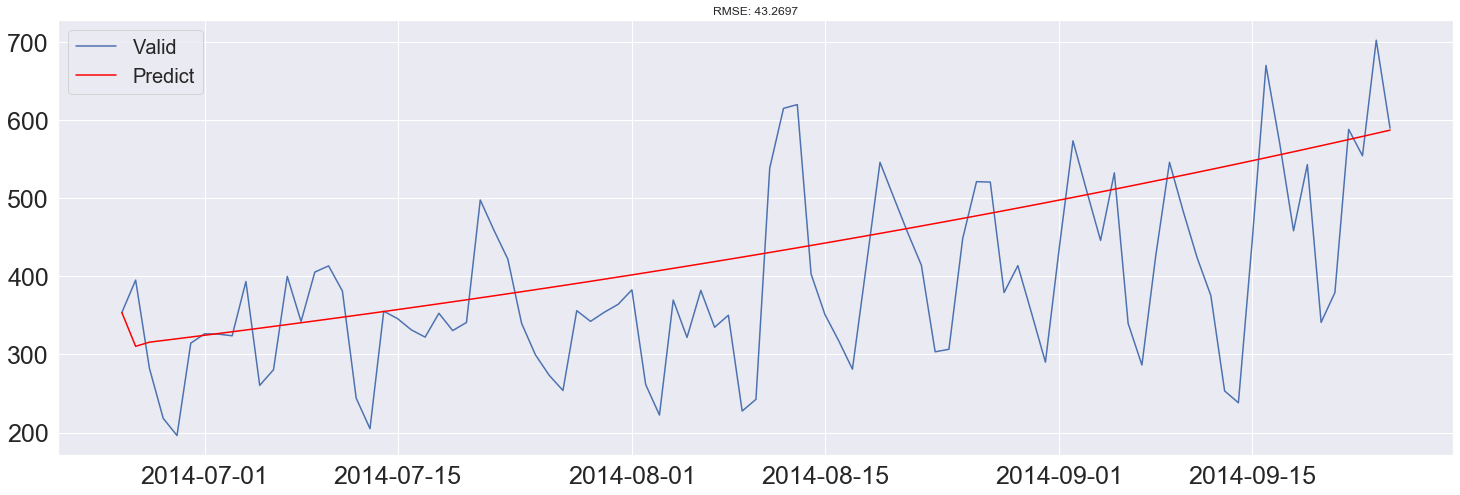

In [575]:

MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25").cumsum().shift().fillna(0) 

Validation_set_prepare=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 

MA_predict = np.exp(Validation_set_prepare.add(MA_predict,fill_value=0))


figure = plt.figure(figsize=(25,8))
plt.plot(valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()

# Combined Arima Model

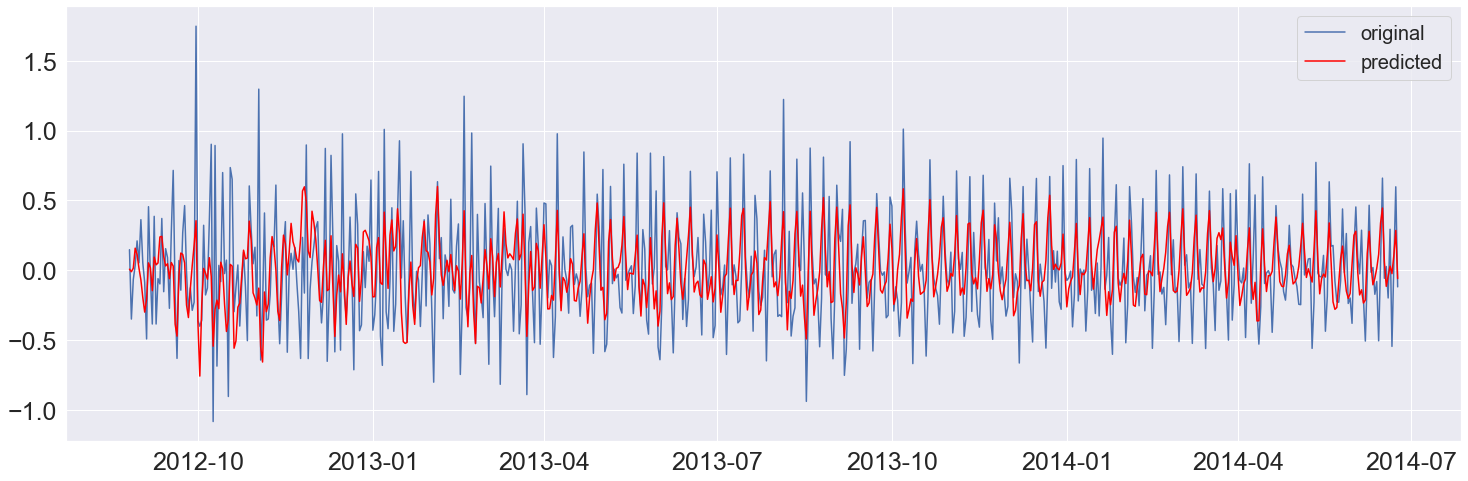

In [576]:
model = ARIMA(train_arima_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
figure = plt.figure(figsize=(25,8))
plt.plot(train_arima_log_withoutSeanality.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

In [577]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    figure = plt.figure(figsize=(25,8))
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()
    return predict

In [578]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    figure = plt.figure(figsize=(25,8))
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [579]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

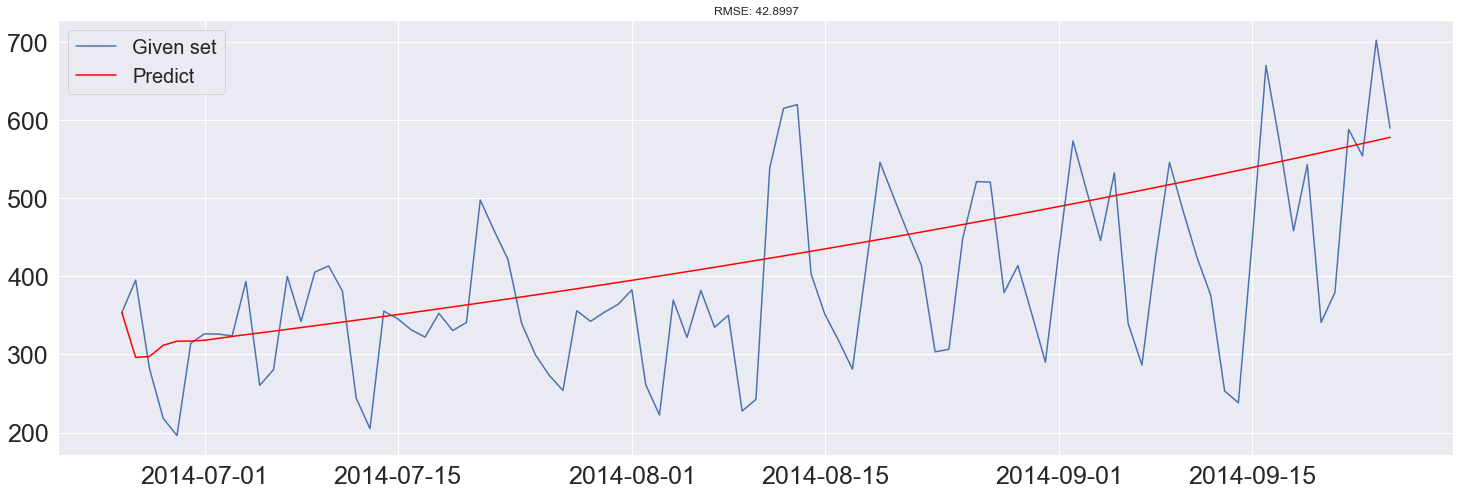

In [580]:
prediction_log= check_prediction_diff(ARIMA_predict_diff, valid)

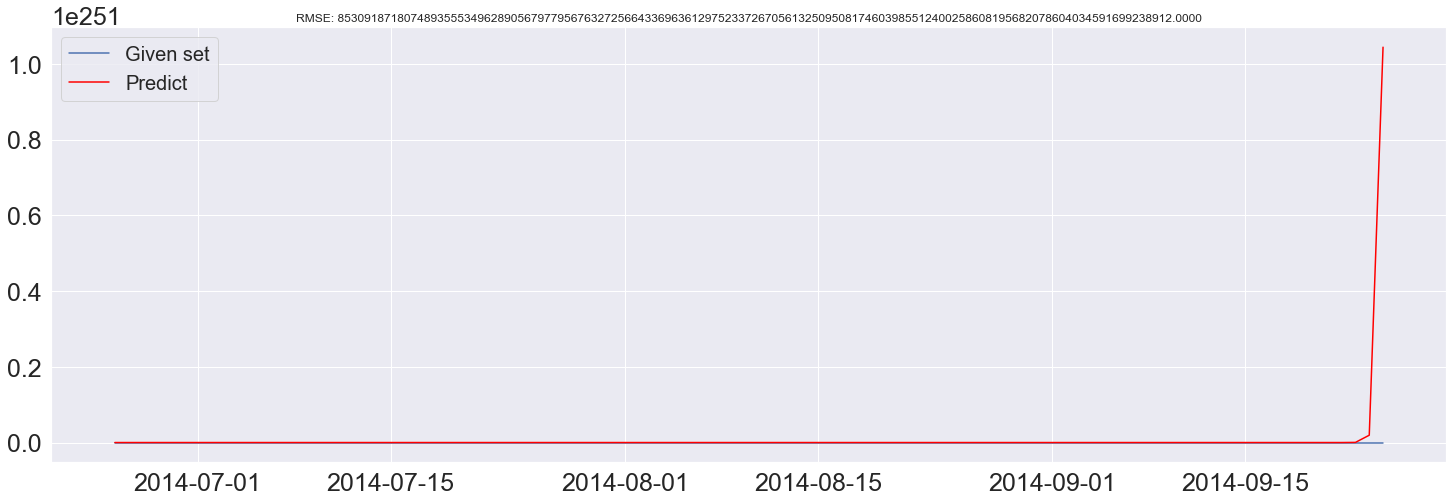

In [581]:
check_prediction_log(prediction_log,valid)